# Building Logistic Regression: Step by Step

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_table('ex2data1.txt', sep=',', header=None, names=['exam1_score', 'exam2_score', 'admitted'], dtype=np.float32)
data

exam1_score  exam2_score  admitted
0     34.623661    78.024696       0.0
1     30.286711    43.894997       0.0
2     35.847408    72.902199       0.0
3     60.182598    86.308556       1.0
4     79.032738    75.344376       1.0
..          ...          ...       ...
95    83.489166    48.380287       1.0
96    42.261700    87.103851       1.0
97    99.315010    68.775406       1.0
98    55.340019    64.931938       1.0
99    74.775894    89.529816       1.0

[100 rows x 3 columns]

In [3]:
X_train = data.loc[:,['exam1_score','exam2_score']].values
Y_train = data.loc[:,['admitted']].values

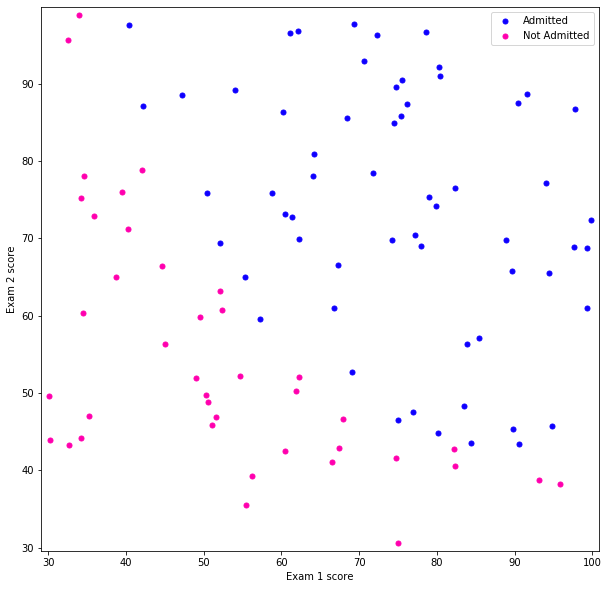

In [4]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-1., np.max(X_train[:,0])+1., np.min(X_train[:,1])-1., np.max(X_train[:,1])+1.])
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='Admitted') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='Not Admitted')
ax.legend()

In [5]:
class LogisticRegression():
    
    def __call__(self, inputs):
        m = inputs.shape[0]
        Z = np.append(np.ones((m,1)), inputs, axis=1)
        H = 1.0/(1.0+np.exp(-np.dot(Z, self.theta)))
        return H
    
    def predict_proba(self, inputs):
        H = self(inputs)
        return H
    
    def predict(self, inputs):
        H = self(inputs)
        return (H>0.5).astype(float)
       
    def costFunc(self, X, Y):
        m = X.shape[0]
        H = self(X)
        J = -(1/m)*np.sum(Y*np.log(H)+(1-Y)*np.log(1-H))
        return J
    
    def gradFunc(self, X, Y):
        m = X.shape[0]
        X_ = np.append(np.ones((m,1)), X, axis=1)
        H = self(X)
        grad = (1/m)*np.dot(X_.T,H-Y)
        return grad
    
    def metricFunc(self, X, Y):
        H = self(X)
        P = (H>0.5).astype(float)
        return np.mean(P == Y).astype(float)
                      
    def fit(self, X_train, Y_train, epochs=50000, learning_rate=0.001):
        self.theta = np.random.normal(loc=0.0, scale=0.05, size=(X_train.shape[1]+1, Y_train.shape[1]))
        z = np.random.normal(loc=0.0, scale=0.05, size=(X_train.shape[1]+1, Y_train.shape[1]))
        print('Training...')
        for epoch in range(epochs):
            start_time = time.time()
            grad = self.gradFunc(X_train, Y_train)
            z = 0.99*z + grad
            self.theta = self.theta - learning_rate*z
            loss = self.costFunc(X_train, Y_train)
            now = time.time()
            duration = now - start_time
            print('Epochs {}/{} - Loss: {}'.format(epoch+1, epochs, loss))
            print('----- {}s -----'.format(np.round(1000*duration)/1000))

In [6]:
model = LogisticRegression()

model.fit(X_train, Y_train)

Training...
Epochs 1/50000 - Loss: 0.7690430275900263
----- 0.0s -----
Epochs 2/50000 - Loss: 1.169101900887799
----- 0.0s -----
Epochs 3/50000 - Loss: 0.7149790939239138
----- 0.0s -----
Epochs 4/50000 - Loss: 0.9694553813954778
----- 0.0s -----
Epochs 5/50000 - Loss: 0.9433161859720633
----- 0.0s -----
Epochs 6/50000 - Loss: 0.6431991424701896
----- 0.0s -----
Epochs 7/50000 - Loss: 1.0748313598151993
----- 0.0s -----
Epochs 8/50000 - Loss: 0.668250637286151
----- 0.0s -----
Epochs 9/50000 - Loss: 0.9775236301973721
----- 0.0s -----
Epochs 10/50000 - Loss: 0.8883320590268613
----- 0.0s -----
Epochs 11/50000 - Loss: 0.8076017288742978
----- 0.0s -----
Epochs 12/50000 - Loss: 1.0495333404266107
----- 0.0s -----
Epochs 13/50000 - Loss: 0.7818214531985763
----- 0.0s -----
Epochs 14/50000 - Loss: 0.9882179397618225
----- 0.0s -----
Epochs 15/50000 - Loss: 0.9451887404460049
----- 0.0s -----
Epochs 16/50000 - Loss: 0.7450833637916137
----- 0.0s -----
Epochs 17/50000 - Loss: 1.0050195741433

Epochs 727/50000 - Loss: 0.43117998973817195
----- 0.0s -----
Epochs 728/50000 - Loss: 0.4310211695581886
----- 0.0s -----
Epochs 729/50000 - Loss: 0.43087510540751356
----- 0.0s -----
Epochs 730/50000 - Loss: 0.43056500472245435
----- 0.0s -----
Epochs 731/50000 - Loss: 0.4305969046779678
----- 0.0s -----
Epochs 732/50000 - Loss: 0.43020671732168825
----- 0.0s -----
Epochs 733/50000 - Loss: 0.4302911970867473
----- 0.0s -----
Epochs 734/50000 - Loss: 0.4299116736806372
----- 0.0s -----
Epochs 735/50000 - Loss: 0.429905650694117
----- 0.0s -----
Epochs 736/50000 - Loss: 0.4296172840823384
----- 0.0s -----
Epochs 737/50000 - Loss: 0.4294394281037572
----- 0.0s -----
Epochs 738/50000 - Loss: 0.4292995703890459
----- 0.0s -----
Epochs 739/50000 - Loss: 0.428960919156599
----- 0.0s -----
Epochs 740/50000 - Loss: 0.4289614720277218
----- 0.0s -----
Epochs 741/50000 - Loss: 0.42856383272487397
----- 0.0s -----
Epochs 742/50000 - Loss: 0.42861375656760664
----- 0.0s -----
Epochs 743/50000 - L

Epochs 1251/50000 - Loss: 0.36371055264647695
----- 0.0s -----
Epochs 1252/50000 - Loss: 0.36361858406585745
----- 0.0s -----
Epochs 1253/50000 - Loss: 0.36352724645290596
----- 0.0s -----
Epochs 1254/50000 - Loss: 0.36343672017619816
----- 0.0s -----
Epochs 1255/50000 - Loss: 0.36334467224823774
----- 0.0s -----
Epochs 1256/50000 - Loss: 0.3632548993465721
----- 0.0s -----
Epochs 1257/50000 - Loss: 0.36316343003257223
----- 0.0s -----
Epochs 1258/50000 - Loss: 0.36307312004870973
----- 0.0s -----
Epochs 1259/50000 - Loss: 0.36298304527001846
----- 0.0s -----
Epochs 1260/50000 - Loss: 0.3628918300519095
----- 0.0s -----
Epochs 1261/50000 - Loss: 0.3628025473995074
----- 0.0s -----
Epochs 1262/50000 - Loss: 0.3627113609402829
----- 0.0s -----
Epochs 1263/50000 - Loss: 0.3626215880426717
----- 0.0s -----
Epochs 1264/50000 - Loss: 0.36253151427038893
----- 0.0s -----
Epochs 1265/50000 - Loss: 0.3624408101084344
----- 0.0s -----
Epochs 1266/50000 - Loss: 0.36235180857765237
----- 0.0s ----

Epochs 1906/50000 - Loss: 0.31979937240720613
----- 0.0s -----
Epochs 1907/50000 - Loss: 0.3197500988118778
----- 0.0s -----
Epochs 1908/50000 - Loss: 0.3197008661700103
----- 0.0s -----
Epochs 1909/50000 - Loss: 0.31965167048565674
----- 0.0s -----
Epochs 1910/50000 - Loss: 0.3196025163430817
----- 0.0s -----
Epochs 1911/50000 - Loss: 0.31955340082277595
----- 0.0s -----
Epochs 1912/50000 - Loss: 0.31950432345116125
----- 0.0s -----
Epochs 1913/50000 - Loss: 0.3194552876642116
----- 0.0s -----
Epochs 1914/50000 - Loss: 0.3194062889401678
----- 0.0s -----
Epochs 1915/50000 - Loss: 0.3193573303767396
----- 0.0s -----
Epochs 1916/50000 - Loss: 0.31930841191193127
----- 0.0s -----
Epochs 1917/50000 - Loss: 0.31925953050716355
----- 0.0s -----
Epochs 1918/50000 - Loss: 0.3192106904275422
----- 0.0s -----
Epochs 1919/50000 - Loss: 0.3191618883100307
----- 0.0s -----
Epochs 1920/50000 - Loss: 0.3191131245303049
----- 0.0s -----
Epochs 1921/50000 - Loss: 0.3190644015544644
----- 0.0s -----
Ep

----- 0.0s -----
Epochs 2477/50000 - Loss: 0.296882160562489
----- 0.0s -----
Epochs 2478/50000 - Loss: 0.2968494583470857
----- 0.0s -----
Epochs 2479/50000 - Loss: 0.29681677718526134
----- 0.0s -----
Epochs 2480/50000 - Loss: 0.2967841170657579
----- 0.0s -----
Epochs 2481/50000 - Loss: 0.29675147796879
----- 0.0s -----
Epochs 2482/50000 - Loss: 0.2967188598630446
----- 0.0s -----
Epochs 2483/50000 - Loss: 0.29668626274050236
----- 0.0s -----
Epochs 2484/50000 - Loss: 0.2966536865748319
----- 0.0s -----
Epochs 2485/50000 - Loss: 0.2966211313402949
----- 0.0s -----
Epochs 2486/50000 - Loss: 0.29658859702833895
----- 0.0s -----
Epochs 2487/50000 - Loss: 0.29655608360786256
----- 0.0s -----
Epochs 2488/50000 - Loss: 0.29652359105958465
----- 0.0s -----
Epochs 2489/50000 - Loss: 0.296491119371148
----- 0.0s -----
Epochs 2490/50000 - Loss: 0.29645866850976793
----- 0.0s -----
Epochs 2491/50000 - Loss: 0.2964262384620209
----- 0.0s -----
Epochs 2492/50000 - Loss: 0.29639382921005664
-----

Epochs 3069/50000 - Loss: 0.28060750530363304
----- 0.0s -----
Epochs 3070/50000 - Loss: 0.28058439219873377
----- 0.0s -----
Epochs 3071/50000 - Loss: 0.28056129145514047
----- 0.0s -----
Epochs 3072/50000 - Loss: 0.28053820306269994
----- 0.0s -----
Epochs 3073/50000 - Loss: 0.2805151270113239
----- 0.0s -----
Epochs 3074/50000 - Loss: 0.28049206329089427
----- 0.0s -----
Epochs 3075/50000 - Loss: 0.28046901189129897
----- 0.0s -----
Epochs 3076/50000 - Loss: 0.28044597280248335
----- 0.0s -----
Epochs 3077/50000 - Loss: 0.2804229460143552
----- 0.0s -----
Epochs 3078/50000 - Loss: 0.28039993151684395
----- 0.0s -----
Epochs 3079/50000 - Loss: 0.28037692929992647
----- 0.0s -----
Epochs 3080/50000 - Loss: 0.2803539393535402
----- 0.0s -----
Epochs 3081/50000 - Loss: 0.28033096166765514
----- 0.0s -----
Epochs 3082/50000 - Loss: 0.28030799623227637
----- 0.0s -----
Epochs 3083/50000 - Loss: 0.2802850430373707
----- 0.0s -----
Epochs 3084/50000 - Loss: 0.28026210207294855
----- 0.0s --

Epochs 3717/50000 - Loss: 0.2678336872301788
----- 0.0s -----
Epochs 3718/50000 - Loss: 0.2678168749279253
----- 0.0s -----
Epochs 3719/50000 - Loss: 0.2678000702259137
----- 0.0s -----
Epochs 3720/50000 - Loss: 0.26778327311891165
----- 0.0s -----
Epochs 3721/50000 - Loss: 0.26776648360169186
----- 0.0s -----
Epochs 3722/50000 - Loss: 0.26774970166903167
----- 0.0s -----
Epochs 3723/50000 - Loss: 0.2677329273157135
----- 0.0s -----
Epochs 3724/50000 - Loss: 0.26771616053652453
----- 0.0s -----
Epochs 3725/50000 - Loss: 0.2676994013262568
----- 0.0s -----
Epochs 3726/50000 - Loss: 0.2676826496797075
----- 0.0s -----
Epochs 3727/50000 - Loss: 0.2676659055916782
----- 0.0s -----
Epochs 3728/50000 - Loss: 0.26764916905697556
----- 0.0s -----
Epochs 3729/50000 - Loss: 0.26763244007041126
----- 0.0s -----
Epochs 3730/50000 - Loss: 0.2676157186268017
----- 0.0s -----
Epochs 3731/50000 - Loss: 0.267599004720968
----- 0.0s -----
Epochs 3732/50000 - Loss: 0.26758229834773606
----- 0.0s -----
Ep

----- 0.0s -----
Epochs 4226/50000 - Loss: 0.26015659523976464
----- 0.0s -----
Epochs 4227/50000 - Loss: 0.26014306798047965
----- 0.001s -----
Epochs 4228/50000 - Loss: 0.2601295461841547
----- 0.0s -----
Epochs 4229/50000 - Loss: 0.2601160298474495
----- 0.0s -----
Epochs 4230/50000 - Loss: 0.26010251896702685
----- 0.0s -----
Epochs 4231/50000 - Loss: 0.26008901353955205
----- 0.001s -----
Epochs 4232/50000 - Loss: 0.2600755135616931
----- 0.0s -----
Epochs 4233/50000 - Loss: 0.260062019030121
----- 0.0s -----
Epochs 4234/50000 - Loss: 0.2600485299415092
----- 0.0s -----
Epochs 4235/50000 - Loss: 0.2600350462925344
----- 0.0s -----
Epochs 4236/50000 - Loss: 0.26002156807987553
----- 0.0s -----
Epochs 4237/50000 - Loss: 0.2600080953002147
----- 0.0s -----
Epochs 4238/50000 - Loss: 0.25999462795023637
----- 0.0s -----
Epochs 4239/50000 - Loss: 0.2599811660266282
----- 0.0s -----
Epochs 4240/50000 - Loss: 0.2599677095260802
----- 0.0s -----
Epochs 4241/50000 - Loss: 0.2599542584452854

Epochs 4845/50000 - Loss: 0.2527116226330683
----- 0.0s -----
Epochs 4846/50000 - Loss: 0.2527009319784586
----- 0.0s -----
Epochs 4847/50000 - Loss: 0.2526902451543372
----- 0.0s -----
Epochs 4848/50000 - Loss: 0.2526795621586425
----- 0.0s -----
Epochs 4849/50000 - Loss: 0.25266888298931384
----- 0.0s -----
Epochs 4850/50000 - Loss: 0.2526582076442926
----- 0.0s -----
Epochs 4851/50000 - Loss: 0.2526475361215215
----- 0.0s -----
Epochs 4852/50000 - Loss: 0.2526368684189446
----- 0.0s -----
Epochs 4853/50000 - Loss: 0.2526262045345077
----- 0.0s -----
Epochs 4854/50000 - Loss: 0.2526155444661581
----- 0.0s -----
Epochs 4855/50000 - Loss: 0.2526048882118441
----- 0.0s -----
Epochs 4856/50000 - Loss: 0.2525942357695163
----- 0.0s -----
Epochs 4857/50000 - Loss: 0.25258358713712614
----- 0.0s -----
Epochs 4858/50000 - Loss: 0.2525729423126269
----- 0.0s -----
Epochs 4859/50000 - Loss: 0.25256230129397333
----- 0.0s -----
Epochs 4860/50000 - Loss: 0.25255166407912144
----- 0.0s -----
Epoc

Epochs 5475/50000 - Loss: 0.24665873057934762
----- 0.0s -----
Epochs 5476/50000 - Loss: 0.2466500991828452
----- 0.0s -----
Epochs 5477/50000 - Loss: 0.24664147056740202
----- 0.0s -----
Epochs 5478/50000 - Loss: 0.24663284473168326
----- 0.0s -----
Epochs 5479/50000 - Loss: 0.24662422167435466
----- 0.0s -----
Epochs 5480/50000 - Loss: 0.24661560139408303
----- 0.0s -----
Epochs 5481/50000 - Loss: 0.24660698388953595
----- 0.0s -----
Epochs 5482/50000 - Loss: 0.24659836915938185
----- 0.0s -----
Epochs 5483/50000 - Loss: 0.24658975720229007
----- 0.0s -----
Epochs 5484/50000 - Loss: 0.2465811480169309
----- 0.0s -----
Epochs 5485/50000 - Loss: 0.24657254160197528
----- 0.0s -----
Epochs 5486/50000 - Loss: 0.2465639379560953
----- 0.0s -----
Epochs 5487/50000 - Loss: 0.24655533707796365
----- 0.0s -----
Epochs 5488/50000 - Loss: 0.24654673896625404
----- 0.0s -----
Epochs 5489/50000 - Loss: 0.2465381436196409
----- 0.0s -----
Epochs 5490/50000 - Loss: 0.24652955103679972
----- 0.0s --

Epochs 6059/50000 - Loss: 0.24205114820963836
----- 0.0s -----
Epochs 6060/50000 - Loss: 0.24204393931504967
----- 0.0s -----
Epochs 6061/50000 - Loss: 0.24203673254921124
----- 0.0s -----
Epochs 6062/50000 - Loss: 0.24202952791119375
----- 0.0s -----
Epochs 6063/50000 - Loss: 0.24202232540006863
----- 0.0s -----
Epochs 6064/50000 - Loss: 0.2420151250149077
----- 0.0s -----
Epochs 6065/50000 - Loss: 0.24200792675478358
----- 0.0s -----
Epochs 6066/50000 - Loss: 0.24200073061876892
----- 0.0s -----
Epochs 6067/50000 - Loss: 0.24199353660593756
----- 0.0s -----
Epochs 6068/50000 - Loss: 0.24198634471536343
----- 0.0s -----
Epochs 6069/50000 - Loss: 0.24197915494612113
----- 0.0s -----
Epochs 6070/50000 - Loss: 0.24197196729728582
----- 0.0s -----
Epochs 6071/50000 - Loss: 0.24196478176793335
----- 0.0s -----
Epochs 6072/50000 - Loss: 0.2419575983571399
----- 0.0s -----
Epochs 6073/50000 - Loss: 0.24195041706398218
----- 0.0s -----
Epochs 6074/50000 - Loss: 0.24194323788753772
----- 0.0s 

----- 0.0s -----
Epochs 6651/50000 - Loss: 0.23812646663150436
----- 0.0s -----
Epochs 6652/50000 - Loss: 0.2381203724200318
----- 0.0s -----
Epochs 6653/50000 - Loss: 0.23811427987083555
----- 0.0s -----
Epochs 6654/50000 - Loss: 0.23810818898325084
----- 0.0s -----
Epochs 6655/50000 - Loss: 0.23810209975661306
----- 0.0s -----
Epochs 6656/50000 - Loss: 0.23809601219025794
----- 0.0s -----
Epochs 6657/50000 - Loss: 0.23808992628352177
----- 0.0s -----
Epochs 6658/50000 - Loss: 0.23808384203574096
----- 0.0s -----
Epochs 6659/50000 - Loss: 0.23807775944625253
----- 0.0s -----
Epochs 6660/50000 - Loss: 0.2380716785143936
----- 0.0s -----
Epochs 6661/50000 - Loss: 0.2380655992395019
----- 0.0s -----
Epochs 6662/50000 - Loss: 0.2380595216209153
----- 0.0s -----
Epochs 6663/50000 - Loss: 0.2380534456579721
----- 0.0s -----
Epochs 6664/50000 - Loss: 0.23804737135001103
----- 0.0s -----
Epochs 6665/50000 - Loss: 0.2380412986963712
----- 0.0s -----
Epochs 6666/50000 - Loss: 0.2380352276963918

----- 0.0s -----
Epochs 7225/50000 - Loss: 0.23488239644853687
----- 0.001s -----
Epochs 7226/50000 - Loss: 0.23487715730416883
----- 0.0s -----
Epochs 7227/50000 - Loss: 0.23487191949264044
----- 0.0s -----
Epochs 7228/50000 - Loss: 0.23486668301345834
----- 0.0s -----
Epochs 7229/50000 - Loss: 0.23486144786612945
----- 0.0s -----
Epochs 7230/50000 - Loss: 0.23485621405016063
----- 0.0s -----
Epochs 7231/50000 - Loss: 0.23485098156505924
----- 0.0s -----
Epochs 7232/50000 - Loss: 0.23484575041033293
----- 0.0s -----
Epochs 7233/50000 - Loss: 0.2348405205854893
----- 0.0s -----
Epochs 7234/50000 - Loss: 0.23483529209003653
----- 0.0s -----
Epochs 7235/50000 - Loss: 0.23483006492348288
----- 0.0s -----
Epochs 7236/50000 - Loss: 0.23482483908533688
----- 0.0s -----
Epochs 7237/50000 - Loss: 0.23481961457510725
----- 0.0s -----
Epochs 7238/50000 - Loss: 0.23481439139230312
----- 0.0s -----
Epochs 7239/50000 - Loss: 0.23480916953643377
----- 0.0s -----
Epochs 7240/50000 - Loss: 0.234803949

Epochs 7835/50000 - Loss: 0.2319168189145938
----- 0.0s -----
Epochs 7836/50000 - Loss: 0.23191230960958048
----- 0.0s -----
Epochs 7837/50000 - Loss: 0.23190780137692404
----- 0.0s -----
Epochs 7838/50000 - Loss: 0.23190329421625616
----- 0.0s -----
Epochs 7839/50000 - Loss: 0.23189878812720893
----- 0.0s -----
Epochs 7840/50000 - Loss: 0.23189428310941462
----- 0.0s -----
Epochs 7841/50000 - Loss: 0.23188977916250547
----- 0.0s -----
Epochs 7842/50000 - Loss: 0.2318852762861141
----- 0.0s -----
Epochs 7843/50000 - Loss: 0.23188077447987337
----- 0.0s -----
Epochs 7844/50000 - Loss: 0.2318762737434159
----- 0.0s -----
Epochs 7845/50000 - Loss: 0.231871774076375
----- 0.0s -----
Epochs 7846/50000 - Loss: 0.2318672754783837
----- 0.0s -----
Epochs 7847/50000 - Loss: 0.23186277794907548
----- 0.0s -----
Epochs 7848/50000 - Loss: 0.231858281488084
----- 0.0s -----
Epochs 7849/50000 - Loss: 0.2318537860950426
----- 0.0s -----
Epochs 7850/50000 - Loss: 0.23184929176958552
----- 0.0s -----
E

Epochs 8447/50000 - Loss: 0.2293445421594595
----- 0.001s -----
Epochs 8448/50000 - Loss: 0.22934062624223747
----- 0.0s -----
Epochs 8449/50000 - Loss: 0.2293367112004538
----- 0.0s -----
Epochs 8450/50000 - Loss: 0.2293327970338283
----- 0.0s -----
Epochs 8451/50000 - Loss: 0.22932888374208069
----- 0.0s -----
Epochs 8452/50000 - Loss: 0.22932497132493093
----- 0.0s -----
Epochs 8453/50000 - Loss: 0.22932105978209913
----- 0.0s -----
Epochs 8454/50000 - Loss: 0.22931714911330545
----- 0.0s -----
Epochs 8455/50000 - Loss: 0.22931323931827013
----- 0.0s -----
Epochs 8456/50000 - Loss: 0.22930933039671378
----- 0.0s -----
Epochs 8457/50000 - Loss: 0.22930542234835685
----- 0.0s -----
Epochs 8458/50000 - Loss: 0.22930151517292005
----- 0.0s -----
Epochs 8459/50000 - Loss: 0.2292976088701241
----- 0.0s -----
Epochs 8460/50000 - Loss: 0.22929370343968983
----- 0.0s -----
Epochs 8461/50000 - Loss: 0.22928979888133852
----- 0.0s -----
Epochs 8462/50000 - Loss: 0.22928589519479117
----- 0.0s 

----- 0.0s -----
Epochs 8955/50000 - Loss: 0.22746221840915792
----- 0.0s -----
Epochs 8956/50000 - Loss: 0.2274587135665855
----- 0.0s -----
Epochs 8957/50000 - Loss: 0.22745520947125883
----- 0.0s -----
Epochs 8958/50000 - Loss: 0.2274517061229513
----- 0.0s -----
Epochs 8959/50000 - Loss: 0.22744820352143613
----- 0.0s -----
Epochs 8960/50000 - Loss: 0.22744470166648684
----- 0.0s -----
Epochs 8961/50000 - Loss: 0.22744120055787703
----- 0.0s -----
Epochs 8962/50000 - Loss: 0.22743770019538048
----- 0.0s -----
Epochs 8963/50000 - Loss: 0.22743420057877084
----- 0.0s -----
Epochs 8964/50000 - Loss: 0.227430701707822
----- 0.0s -----
Epochs 8965/50000 - Loss: 0.22742720358230795
----- 0.0s -----
Epochs 8966/50000 - Loss: 0.22742370620200258
----- 0.0s -----
Epochs 8967/50000 - Loss: 0.2274202095666802
----- 0.0s -----
Epochs 8968/50000 - Loss: 0.22741671367611493
----- 0.0s -----
Epochs 8969/50000 - Loss: 0.2274132185300811
----- 0.0s -----
Epochs 8970/50000 - Loss: 0.2274097241283532

Epochs 9562/50000 - Loss: 0.2254642904539544
----- 0.0s -----
Epochs 9563/50000 - Loss: 0.2254612006641771
----- 0.0s -----
Epochs 9564/50000 - Loss: 0.22545811149937295
----- 0.0s -----
Epochs 9565/50000 - Loss: 0.22545502295936323
----- 0.0s -----
Epochs 9566/50000 - Loss: 0.22545193504396963
----- 0.0s -----
Epochs 9567/50000 - Loss: 0.22544884775301366
----- 0.0s -----
Epochs 9568/50000 - Loss: 0.22544576108631714
----- 0.0s -----
Epochs 9569/50000 - Loss: 0.22544267504370155
----- 0.0s -----
Epochs 9570/50000 - Loss: 0.22543958962498903
----- 0.0s -----
Epochs 9571/50000 - Loss: 0.2254365048300013
----- 0.0s -----
Epochs 9572/50000 - Loss: 0.22543342065856029
----- 0.0s -----
Epochs 9573/50000 - Loss: 0.22543033711048807
----- 0.0s -----
Epochs 9574/50000 - Loss: 0.22542725418560672
----- 0.0s -----
Epochs 9575/50000 - Loss: 0.22542417188373848
----- 0.0s -----
Epochs 9576/50000 - Loss: 0.22542109020470544
----- 0.0s -----
Epochs 9577/50000 - Loss: 0.22541800914833
----- 0.0s ----

Epochs 10172/50000 - Loss: 0.22368925138240398
----- 0.0s -----
Epochs 10173/50000 - Loss: 0.22368651205420054
----- 0.0s -----
Epochs 10174/50000 - Loss: 0.22368377325358255
----- 0.0s -----
Epochs 10175/50000 - Loss: 0.2236810349804073
----- 0.0s -----
Epochs 10176/50000 - Loss: 0.22367829723453259
----- 0.0s -----
Epochs 10177/50000 - Loss: 0.22367556001581596
----- 0.0s -----
Epochs 10178/50000 - Loss: 0.22367282332411517
----- 0.0s -----
Epochs 10179/50000 - Loss: 0.22367008715928807
----- 0.0s -----
Epochs 10180/50000 - Loss: 0.22366735152119238
----- 0.0s -----
Epochs 10181/50000 - Loss: 0.22366461640968602
----- 0.0s -----
Epochs 10182/50000 - Loss: 0.22366188182462698
----- 0.0s -----
Epochs 10183/50000 - Loss: 0.223659147765873
----- 0.0s -----
Epochs 10184/50000 - Loss: 0.22365641423328228
----- 0.0s -----
Epochs 10185/50000 - Loss: 0.22365368122671295
----- 0.0s -----
Epochs 10186/50000 - Loss: 0.22365094874602306
----- 0.0s -----
Epochs 10187/50000 - Loss: 0.22364821679107

Epochs 10776/50000 - Loss: 0.22212583514721704
----- 0.0s -----
Epochs 10777/50000 - Loss: 0.22212339029295686
----- 0.0s -----
Epochs 10778/50000 - Loss: 0.2221209458887883
----- 0.0s -----
Epochs 10779/50000 - Loss: 0.22211850193459615
----- 0.0s -----
Epochs 10780/50000 - Loss: 0.2221160584302652
----- 0.0s -----
Epochs 10781/50000 - Loss: 0.22211361537568006
----- 0.0s -----
Epochs 10782/50000 - Loss: 0.22211117277072556
----- 0.0s -----
Epochs 10783/50000 - Loss: 0.22210873061528655
----- 0.0s -----
Epochs 10784/50000 - Loss: 0.22210628890924797
----- 0.0s -----
Epochs 10785/50000 - Loss: 0.22210384765249458
----- 0.0s -----
Epochs 10786/50000 - Loss: 0.22210140684491148
----- 0.0s -----
Epochs 10787/50000 - Loss: 0.2220989664863836
----- 0.0s -----
Epochs 10788/50000 - Loss: 0.2220965265767959
----- 0.0s -----
Epochs 10789/50000 - Loss: 0.22209408711603362
----- 0.0s -----
Epochs 10790/50000 - Loss: 0.22209164810398171
----- 0.0s -----
Epochs 10791/50000 - Loss: 0.222089209540525

Epochs 11335/50000 - Loss: 0.22082616965292526
----- 0.001s -----
Epochs 11336/50000 - Loss: 0.22082395948555392
----- 0.0s -----
Epochs 11337/50000 - Loss: 0.22082174970947058
----- 0.0s -----
Epochs 11338/50000 - Loss: 0.22081954032457943
----- 0.0s -----
Epochs 11339/50000 - Loss: 0.22081733133078485
----- 0.0s -----
Epochs 11340/50000 - Loss: 0.220815122727991
----- 0.0s -----
Epochs 11341/50000 - Loss: 0.22081291451610216
----- 0.0s -----
Epochs 11342/50000 - Loss: 0.2208107066950227
----- 0.0s -----
Epochs 11343/50000 - Loss: 0.22080849926465695
----- 0.0s -----
Epochs 11344/50000 - Loss: 0.22080629222490938
----- 0.0s -----
Epochs 11345/50000 - Loss: 0.22080408557568432
----- 0.0s -----
Epochs 11346/50000 - Loss: 0.22080187931688627
----- 0.0s -----
Epochs 11347/50000 - Loss: 0.22079967344841975
----- 0.0s -----
Epochs 11348/50000 - Loss: 0.2207974679701893
----- 0.0s -----
Epochs 11349/50000 - Loss: 0.22079526288209933
----- 0.0s -----
Epochs 11350/50000 - Loss: 0.2207930581840

Epochs 11933/50000 - Loss: 0.21957109478376322
----- 0.0s -----
Epochs 11934/50000 - Loss: 0.21956910254507248
----- 0.0s -----
Epochs 11935/50000 - Loss: 0.2195671106455081
----- 0.0s -----
Epochs 11936/50000 - Loss: 0.21956511908499093
----- 0.0s -----
Epochs 11937/50000 - Loss: 0.21956312786344176
----- 0.0s -----
Epochs 11938/50000 - Loss: 0.21956113698078117
----- 0.0s -----
Epochs 11939/50000 - Loss: 0.21955914643693006
----- 0.0s -----
Epochs 11940/50000 - Loss: 0.2195571562318091
----- 0.0s -----
Epochs 11941/50000 - Loss: 0.21955516636533934
----- 0.0s -----
Epochs 11942/50000 - Loss: 0.2195531768374415
----- 0.0s -----
Epochs 11943/50000 - Loss: 0.2195511876480365
----- 0.0s -----
Epochs 11944/50000 - Loss: 0.21954919879704515
----- 0.0s -----
Epochs 11945/50000 - Loss: 0.2195472102843885
----- 0.0s -----
Epochs 11946/50000 - Loss: 0.2195452221099876
----- 0.0s -----
Epochs 11947/50000 - Loss: 0.21954323427376315
----- 0.0s -----
Epochs 11948/50000 - Loss: 0.21954124677563638

----- 0.0s -----
Epochs 12488/50000 - Loss: 0.21851538273391188
----- 0.0s -----
Epochs 12489/50000 - Loss: 0.21851356717885714
----- 0.0s -----
Epochs 12490/50000 - Loss: 0.21851175192243152
----- 0.0s -----
Epochs 12491/50000 - Loss: 0.2185099369645681
----- 0.0s -----
Epochs 12492/50000 - Loss: 0.21850812230519975
----- 0.0s -----
Epochs 12493/50000 - Loss: 0.2185063079442594
----- 0.0s -----
Epochs 12494/50000 - Loss: 0.21850449388168017
----- 0.0s -----
Epochs 12495/50000 - Loss: 0.218502680117395
----- 0.0s -----
Epochs 12496/50000 - Loss: 0.218500866651337
----- 0.0s -----
Epochs 12497/50000 - Loss: 0.21849905348343918
----- 0.0s -----
Epochs 12498/50000 - Loss: 0.21849724061363465
----- 0.0s -----
Epochs 12499/50000 - Loss: 0.21849542804185657
----- 0.0s -----
Epochs 12500/50000 - Loss: 0.21849361576803789
----- 0.0s -----
Epochs 12501/50000 - Loss: 0.21849180379211192
----- 0.0s -----
Epochs 12502/50000 - Loss: 0.21848999211401177
----- 0.0s -----
Epochs 12503/50000 - Loss: 0.

Epochs 13222/50000 - Loss: 0.21725892389217014
----- 0.0s -----
Epochs 13223/50000 - Loss: 0.21725731071002677
----- 0.0s -----
Epochs 13224/50000 - Loss: 0.21725569778217785
----- 0.0s -----
Epochs 13225/50000 - Loss: 0.21725408510856895
----- 0.0s -----
Epochs 13226/50000 - Loss: 0.2172524726891459
----- 0.0s -----
Epochs 13227/50000 - Loss: 0.21725086052385437
----- 0.0s -----
Epochs 13228/50000 - Loss: 0.2172492486126401
----- 0.0s -----
Epochs 13229/50000 - Loss: 0.2172476369554489
----- 0.0s -----
Epochs 13230/50000 - Loss: 0.2172460255522265
----- 0.0s -----
Epochs 13231/50000 - Loss: 0.21724441440291872
----- 0.0s -----
Epochs 13232/50000 - Loss: 0.21724280350747147
----- 0.0s -----
Epochs 13233/50000 - Loss: 0.21724119286583043
----- 0.0s -----
Epochs 13234/50000 - Loss: 0.21723958247794148
----- 0.0s -----
Epochs 13235/50000 - Loss: 0.21723797234375053
----- 0.0s -----
Epochs 13236/50000 - Loss: 0.21723636246320344
----- 0.0s -----
Epochs 13237/50000 - Loss: 0.217234752836246

Epochs 13825/50000 - Loss: 0.21633043558944828
----- 0.0s -----
Epochs 13826/50000 - Loss: 0.2163289664171016
----- 0.0s -----
Epochs 13827/50000 - Loss: 0.21632749746888572
----- 0.0s -----
Epochs 13828/50000 - Loss: 0.21632602874475454
----- 0.0s -----
Epochs 13829/50000 - Loss: 0.21632456024466218
----- 0.0s -----
Epochs 13830/50000 - Loss: 0.21632309196856256
----- 0.0s -----
Epochs 13831/50000 - Loss: 0.21632162391640947
----- 0.0s -----
Epochs 13832/50000 - Loss: 0.21632015608815733
----- 0.0s -----
Epochs 13833/50000 - Loss: 0.21631868848375996
----- 0.0s -----
Epochs 13834/50000 - Loss: 0.21631722110317142
----- 0.0s -----
Epochs 13835/50000 - Loss: 0.21631575394634583
----- 0.0s -----
Epochs 13836/50000 - Loss: 0.2163142870132372
----- 0.0s -----
Epochs 13837/50000 - Loss: 0.21631282030379967
----- 0.0s -----
Epochs 13838/50000 - Loss: 0.21631135381798738
----- 0.0s -----
Epochs 13839/50000 - Loss: 0.21630988755575437
----- 0.0s -----
Epochs 13840/50000 - Loss: 0.2163084215170

Epochs 14457/50000 - Loss: 0.21544476035618612
----- 0.0s -----
Epochs 14458/50000 - Loss: 0.2154434241488831
----- 0.0s -----
Epochs 14459/50000 - Loss: 0.2154420881389237
----- 0.0s -----
Epochs 14460/50000 - Loss: 0.21544075232626905
----- 0.0s -----
Epochs 14461/50000 - Loss: 0.2154394167108801
----- 0.0s -----
Epochs 14462/50000 - Loss: 0.215438081292718
----- 0.0s -----
Epochs 14463/50000 - Loss: 0.2154367460717436
----- 0.0s -----
Epochs 14464/50000 - Loss: 0.2154354110479182
----- 0.0s -----
Epochs 14465/50000 - Loss: 0.2154340762212025
----- 0.0s -----
Epochs 14466/50000 - Loss: 0.21543274159155806
----- 0.0s -----
Epochs 14467/50000 - Loss: 0.21543140715894563
----- 0.0s -----
Epochs 14468/50000 - Loss: 0.21543007292332644
----- 0.0s -----
Epochs 14469/50000 - Loss: 0.21542873888466166
----- 0.0s -----
Epochs 14470/50000 - Loss: 0.21542740504291216
----- 0.0s -----
Epochs 14471/50000 - Loss: 0.21542607139803926
----- 0.0s -----
Epochs 14472/50000 - Loss: 0.21542473795000416
-

Epochs 14971/50000 - Loss: 0.21478311863160116
----- 0.0s -----
Epochs 14972/50000 - Loss: 0.21478187893660672
----- 0.0s -----
Epochs 14973/50000 - Loss: 0.21478063942017372
----- 0.0s -----
Epochs 14974/50000 - Loss: 0.2147794000822678
----- 0.0s -----
Epochs 14975/50000 - Loss: 0.21477816092285487
----- 0.0s -----
Epochs 14976/50000 - Loss: 0.2147769219419007
----- 0.0s -----
Epochs 14977/50000 - Loss: 0.21477568313937107
----- 0.0s -----
Epochs 14978/50000 - Loss: 0.21477444451523162
----- 0.0s -----
Epochs 14979/50000 - Loss: 0.21477320606944844
----- 0.0s -----
Epochs 14980/50000 - Loss: 0.21477196780198732
----- 0.0s -----
Epochs 14981/50000 - Loss: 0.214770729712814
----- 0.0s -----
Epochs 14982/50000 - Loss: 0.21476949180189425
----- 0.0s -----
Epochs 14983/50000 - Loss: 0.21476825406919411
----- 0.0s -----
Epochs 14984/50000 - Loss: 0.2147670165146794
----- 0.0s -----
Epochs 14985/50000 - Loss: 0.21476577913831585
----- 0.0s -----
Epochs 14986/50000 - Loss: 0.2147645419400694

Epochs 15603/50000 - Loss: 0.2140338567971903
----- 0.0s -----
Epochs 15604/50000 - Loss: 0.21403272346923025
----- 0.0s -----
Epochs 15605/50000 - Loss: 0.2140315902997971
----- 0.0s -----
Epochs 15606/50000 - Loss: 0.21403045728886153
----- 0.0s -----
Epochs 15607/50000 - Loss: 0.2140293244363942
----- 0.0s -----
Epochs 15608/50000 - Loss: 0.21402819174236581
----- 0.0s -----
Epochs 15609/50000 - Loss: 0.21402705920674706
----- 0.0s -----
Epochs 15610/50000 - Loss: 0.21402592682950872
----- 0.0s -----
Epochs 15611/50000 - Loss: 0.21402479461062132
----- 0.0s -----
Epochs 15612/50000 - Loss: 0.21402366255005575
----- 0.0s -----
Epochs 15613/50000 - Loss: 0.21402253064778265
----- 0.0s -----
Epochs 15614/50000 - Loss: 0.2140213989037728
----- 0.0s -----
Epochs 15615/50000 - Loss: 0.21402026731799687
----- 0.0s -----
Epochs 15616/50000 - Loss: 0.21401913589042568
----- 0.0s -----
Epochs 15617/50000 - Loss: 0.21401800462102988
----- 0.0s -----
Epochs 15618/50000 - Loss: 0.214016873509780

----- 0.0s -----
Epochs 16221/50000 - Loss: 0.21336257647749424
----- 0.0s -----
Epochs 16222/50000 - Loss: 0.21336153579090122
----- 0.0s -----
Epochs 16223/50000 - Loss: 0.2133604952459729
----- 0.0s -----
Epochs 16224/50000 - Loss: 0.21335945484268404
----- 0.0s -----
Epochs 16225/50000 - Loss: 0.2133584145810092
----- 0.0s -----
Epochs 16226/50000 - Loss: 0.21335737446092298
----- 0.0s -----
Epochs 16227/50000 - Loss: 0.2133563344824001
----- 0.0s -----
Epochs 16228/50000 - Loss: 0.21335529464541533
----- 0.0s -----
Epochs 16229/50000 - Loss: 0.21335425494994326
----- 0.0s -----
Epochs 16230/50000 - Loss: 0.2133532153959584
----- 0.0s -----
Epochs 16231/50000 - Loss: 0.21335217598343564
----- 0.0s -----
Epochs 16232/50000 - Loss: 0.21335113671234962
----- 0.0s -----
Epochs 16233/50000 - Loss: 0.21335009758267504
----- 0.0s -----
Epochs 16234/50000 - Loss: 0.2133490585943866
----- 0.0s -----
Epochs 16235/50000 - Loss: 0.21334801974745893
----- 0.0s -----
Epochs 16236/50000 - Loss: 0

Epochs 16792/50000 - Loss: 0.2127906404623603
----- 0.0s -----
Epochs 16793/50000 - Loss: 0.21278967671362328
----- 0.0s -----
Epochs 16794/50000 - Loss: 0.21278871309297615
----- 0.0s -----
Epochs 16795/50000 - Loss: 0.21278774960039662
----- 0.0s -----
Epochs 16796/50000 - Loss: 0.21278678623586253
----- 0.0s -----
Epochs 16797/50000 - Loss: 0.2127858229993516
----- 0.0s -----
Epochs 16798/50000 - Loss: 0.2127848598908415
----- 0.0s -----
Epochs 16799/50000 - Loss: 0.21278389691031005
----- 0.0s -----
Epochs 16800/50000 - Loss: 0.21278293405773493
----- 0.0s -----
Epochs 16801/50000 - Loss: 0.21278197133309398
----- 0.0s -----
Epochs 16802/50000 - Loss: 0.21278100873636493
----- 0.0s -----
Epochs 16803/50000 - Loss: 0.21278004626752559
----- 0.0s -----
Epochs 16804/50000 - Loss: 0.21277908392655373
----- 0.0s -----
Epochs 16805/50000 - Loss: 0.21277812171342703
----- 0.0s -----
Epochs 16806/50000 - Loss: 0.21277715962812335
----- 0.0s -----
Epochs 16807/50000 - Loss: 0.21277619767062

----- 0.0s -----
Epochs 17448/50000 - Loss: 0.2121849339571269
----- 0.0s -----
Epochs 17449/50000 - Loss: 0.212184049674493
----- 0.0s -----
Epochs 17450/50000 - Loss: 0.21218316550635014
----- 0.0s -----
Epochs 17451/50000 - Loss: 0.21218228145267898
----- 0.0s -----
Epochs 17452/50000 - Loss: 0.21218139751346027
----- 0.0s -----
Epochs 17453/50000 - Loss: 0.21218051368867472
----- 0.0s -----
Epochs 17454/50000 - Loss: 0.21217962997830309
----- 0.0s -----
Epochs 17455/50000 - Loss: 0.21217874638232612
----- 0.0s -----
Epochs 17456/50000 - Loss: 0.2121778629007245
----- 0.0s -----
Epochs 17457/50000 - Loss: 0.21217697953347908
----- 0.0s -----
Epochs 17458/50000 - Loss: 0.21217609628057058
----- 0.0s -----
Epochs 17459/50000 - Loss: 0.2121752131419796
----- 0.0s -----
Epochs 17460/50000 - Loss: 0.21217433011768716
----- 0.0s -----
Epochs 17461/50000 - Loss: 0.21217344720767384
----- 0.0s -----
Epochs 17462/50000 - Loss: 0.21217256441192045
----- 0.0s -----
Epochs 17463/50000 - Loss: 0

Epochs 17970/50000 - Loss: 0.2117384650626631
----- 0.0s -----
Epochs 17971/50000 - Loss: 0.21173763801792533
----- 0.0s -----
Epochs 17972/50000 - Loss: 0.21173681107815712
----- 0.0s -----
Epochs 17973/50000 - Loss: 0.21173598424334134
----- 0.0s -----
Epochs 17974/50000 - Loss: 0.2117351575134607
----- 0.0s -----
Epochs 17975/50000 - Loss: 0.2117343308884978
----- 0.0s -----
Epochs 17976/50000 - Loss: 0.21173350436843577
----- 0.0s -----
Epochs 17977/50000 - Loss: 0.21173267795325712
----- 0.0s -----
Epochs 17978/50000 - Loss: 0.21173185164294459
----- 0.0s -----
Epochs 17979/50000 - Loss: 0.21173102543748112
----- 0.0s -----
Epochs 17980/50000 - Loss: 0.21173019933684933
----- 0.0s -----
Epochs 17981/50000 - Loss: 0.21172937334103206
----- 0.0s -----
Epochs 17982/50000 - Loss: 0.21172854745001224
----- 0.0s -----
Epochs 17983/50000 - Loss: 0.2117277216637724
----- 0.0s -----
Epochs 17984/50000 - Loss: 0.21172689598229558
----- 0.0s -----
Epochs 17985/50000 - Loss: 0.211726070405564

Epochs 18611/50000 - Loss: 0.2112291317025874
----- 0.0s -----
Epochs 18612/50000 - Loss: 0.21122836855787236
----- 0.0s -----
Epochs 18613/50000 - Loss: 0.2112276055077765
----- 0.0s -----
Epochs 18614/50000 - Loss: 0.21122684255228452
----- 0.0s -----
Epochs 18615/50000 - Loss: 0.2112260796913816
----- 0.0s -----
Epochs 18616/50000 - Loss: 0.2112253169250523
----- 0.0s -----
Epochs 18617/50000 - Loss: 0.2112245542532818
----- 0.0s -----
Epochs 18618/50000 - Loss: 0.21122379167605496
----- 0.0s -----
Epochs 18619/50000 - Loss: 0.2112230291933566
----- 0.0s -----
Epochs 18620/50000 - Loss: 0.21122226680517167
----- 0.0s -----
Epochs 18621/50000 - Loss: 0.21122150451148508
----- 0.0s -----
Epochs 18622/50000 - Loss: 0.2112207423122818
----- 0.0s -----
Epochs 18623/50000 - Loss: 0.21121998020754668
----- 0.0s -----
Epochs 18624/50000 - Loss: 0.21121921819726475
----- 0.0s -----
Epochs 18625/50000 - Loss: 0.21121845628142077
----- 0.0s -----
Epochs 18626/50000 - Loss: 0.2112176944599999
-

----- 0.0s -----
Epochs 19220/50000 - Loss: 0.21078134513615085
----- 0.001s -----
Epochs 19221/50000 - Loss: 0.21078063692918558
----- 0.0s -----
Epochs 19222/50000 - Loss: 0.21077992880818297
----- 0.0s -----
Epochs 19223/50000 - Loss: 0.21077922077312963
----- 0.0s -----
Epochs 19224/50000 - Loss: 0.21077851282401208
----- 0.0s -----
Epochs 19225/50000 - Loss: 0.21077780496081697
----- 0.0s -----
Epochs 19226/50000 - Loss: 0.21077709718353096
----- 0.0s -----
Epochs 19227/50000 - Loss: 0.2107763894921407
----- 0.0s -----
Epochs 19228/50000 - Loss: 0.2107756818866329
----- 0.0s -----
Epochs 19229/50000 - Loss: 0.2107749743669941
----- 0.0s -----
Epochs 19230/50000 - Loss: 0.21077426693321108
----- 0.0s -----
Epochs 19231/50000 - Loss: 0.2107735595852703
----- 0.0s -----
Epochs 19232/50000 - Loss: 0.21077285232315868
----- 0.0s -----
Epochs 19233/50000 - Loss: 0.21077214514686268
----- 0.0s -----
Epochs 19234/50000 - Loss: 0.210771438056369
----- 0.001s -----
Epochs 19235/50000 - Loss

Epochs 19836/50000 - Loss: 0.2103608697529172
----- 0.0s -----
Epochs 19837/50000 - Loss: 0.2103602120658882
----- 0.0s -----
Epochs 19838/50000 - Loss: 0.21035955445706514
----- 0.0s -----
Epochs 19839/50000 - Loss: 0.21035889692643606
----- 0.0s -----
Epochs 19840/50000 - Loss: 0.2103582394739891
----- 0.0s -----
Epochs 19841/50000 - Loss: 0.2103575820997125
----- 0.0s -----
Epochs 19842/50000 - Loss: 0.21035692480359447
----- 0.0s -----
Epochs 19843/50000 - Loss: 0.21035626758562292
----- 0.0s -----
Epochs 19844/50000 - Loss: 0.2103556104457863
----- 0.0s -----
Epochs 19845/50000 - Loss: 0.21035495338407248
----- 0.0s -----
Epochs 19846/50000 - Loss: 0.21035429640046988
----- 0.0s -----
Epochs 19847/50000 - Loss: 0.21035363949496652
----- 0.0s -----
Epochs 19848/50000 - Loss: 0.21035298266755068
----- 0.0s -----
Epochs 19849/50000 - Loss: 0.21035232591821032
----- 0.0s -----
Epochs 19850/50000 - Loss: 0.21035166924693394
----- 0.0s -----
Epochs 19851/50000 - Loss: 0.2103510126537093

Epochs 20469/50000 - Loss: 0.209959713195837
----- 0.0s -----
Epochs 20470/50000 - Loss: 0.20995910273455995
----- 0.0s -----
Epochs 20471/50000 - Loss: 0.20995849234441963
----- 0.0s -----
Epochs 20472/50000 - Loss: 0.2099578820254056
----- 0.0s -----
Epochs 20473/50000 - Loss: 0.2099572717775073
----- 0.0s -----
Epochs 20474/50000 - Loss: 0.2099566616007142
----- 0.002s -----
Epochs 20475/50000 - Loss: 0.20995605149501587
----- 0.0s -----
Epochs 20476/50000 - Loss: 0.2099554414604018
----- 0.0s -----
Epochs 20477/50000 - Loss: 0.20995483149686134
----- 0.0s -----
Epochs 20478/50000 - Loss: 0.2099542216043842
----- 0.0s -----
Epochs 20479/50000 - Loss: 0.20995361178295968
----- 0.0s -----
Epochs 20480/50000 - Loss: 0.2099530020325774
----- 0.0s -----
Epochs 20481/50000 - Loss: 0.20995239235322696
----- 0.0s -----
Epochs 20482/50000 - Loss: 0.20995178274489767
----- 0.0s -----
Epochs 20483/50000 - Loss: 0.20995117320757914
----- 0.0s -----
Epochs 20484/50000 - Loss: 0.20995056374126084

Epochs 21073/50000 - Loss: 0.20960357533477283
----- 0.0s -----
Epochs 21074/50000 - Loss: 0.2096030059949758
----- 0.0s -----
Epochs 21075/50000 - Loss: 0.20960243672030732
----- 0.0s -----
Epochs 21076/50000 - Loss: 0.20960186751075813
----- 0.0s -----
Epochs 21077/50000 - Loss: 0.20960129836631886
----- 0.0s -----
Epochs 21078/50000 - Loss: 0.20960072928697998
----- 0.0s -----
Epochs 21079/50000 - Loss: 0.20960016027273218
----- 0.0s -----
Epochs 21080/50000 - Loss: 0.20959959132356598
----- 0.0s -----
Epochs 21081/50000 - Loss: 0.20959902243947207
----- 0.0s -----
Epochs 21082/50000 - Loss: 0.20959845362044102
----- 0.0s -----
Epochs 21083/50000 - Loss: 0.20959788486646344
----- 0.0s -----
Epochs 21084/50000 - Loss: 0.20959731617753
----- 0.0s -----
Epochs 21085/50000 - Loss: 0.20959674755363122
----- 0.0s -----
Epochs 21086/50000 - Loss: 0.2095961789947578
----- 0.0s -----
Epochs 21087/50000 - Loss: 0.20959561050090025
----- 0.0s -----
Epochs 21088/50000 - Loss: 0.2095950420720491

----- 0.0s -----
Epochs 21682/50000 - Loss: 0.20926856222056803
----- 0.0s -----
Epochs 21683/50000 - Loss: 0.20926803086497447
----- 0.0s -----
Epochs 21684/50000 - Loss: 0.2092674995690852
----- 0.0s -----
Epochs 21685/50000 - Loss: 0.2092669683328918
----- 0.0s -----
Epochs 21686/50000 - Loss: 0.20926643715638577
----- 0.0s -----
Epochs 21687/50000 - Loss: 0.20926590603955866
----- 0.0s -----
Epochs 21688/50000 - Loss: 0.20926537498240208
----- 0.0s -----
Epochs 21689/50000 - Loss: 0.2092648439849077
----- 0.0s -----
Epochs 21690/50000 - Loss: 0.209264313047067
----- 0.0s -----
Epochs 21691/50000 - Loss: 0.2092637821688716
----- 0.0s -----
Epochs 21692/50000 - Loss: 0.20926325135031298
----- 0.0s -----
Epochs 21693/50000 - Loss: 0.20926272059138282
----- 0.0s -----
Epochs 21694/50000 - Loss: 0.20926218989207265
----- 0.0s -----
Epochs 21695/50000 - Loss: 0.20926165925237414
----- 0.0s -----
Epochs 21696/50000 - Loss: 0.2092611286722789
----- 0.0s -----
Epochs 21697/50000 - Loss: 0.2

Epochs 22240/50000 - Loss: 0.20898110707023684
----- 0.0s -----
Epochs 22241/50000 - Loss: 0.20898060776143682
----- 0.0s -----
Epochs 22242/50000 - Loss: 0.20898010850786075
----- 0.0s -----
Epochs 22243/50000 - Loss: 0.2089796093095009
----- 0.0s -----
Epochs 22244/50000 - Loss: 0.20897911016634965
----- 0.0s -----
Epochs 22245/50000 - Loss: 0.20897861107839938
----- 0.0s -----
Epochs 22246/50000 - Loss: 0.20897811204564246
----- 0.0s -----
Epochs 22247/50000 - Loss: 0.2089776130680712
----- 0.0s -----
Epochs 22248/50000 - Loss: 0.20897711414567802
----- 0.0s -----
Epochs 22249/50000 - Loss: 0.20897661527845518
----- 0.0s -----
Epochs 22250/50000 - Loss: 0.20897611646639516
----- 0.0s -----
Epochs 22251/50000 - Loss: 0.20897561770949036
----- 0.0s -----
Epochs 22252/50000 - Loss: 0.208975119007733
----- 0.0s -----
Epochs 22253/50000 - Loss: 0.2089746203611155
----- 0.0s -----
Epochs 22254/50000 - Loss: 0.20897412176963037
----- 0.0s -----
Epochs 22255/50000 - Loss: 0.2089736232332697

----- 0.0s -----
Epochs 22760/50000 - Loss: 0.20872874422635204
----- 0.0s -----
Epochs 22761/50000 - Loss: 0.2087282726326496
----- 0.0s -----
Epochs 22762/50000 - Loss: 0.20872780109036926
----- 0.0s -----
Epochs 22763/50000 - Loss: 0.20872732959950377
----- 0.0s -----
Epochs 22764/50000 - Loss: 0.20872685816004616
----- 0.0s -----
Epochs 22765/50000 - Loss: 0.20872638677198957
----- 0.0s -----
Epochs 22766/50000 - Loss: 0.2087259154353269
----- 0.0s -----
Epochs 22767/50000 - Loss: 0.2087254441500512
----- 0.0s -----
Epochs 22768/50000 - Loss: 0.2087249729161555
----- 0.0s -----
Epochs 22769/50000 - Loss: 0.20872450173363277
----- 0.0s -----
Epochs 22770/50000 - Loss: 0.2087240306024761
----- 0.0s -----
Epochs 22771/50000 - Loss: 0.2087235595226785
----- 0.0s -----
Epochs 22772/50000 - Loss: 0.20872308849423288
----- 0.0s -----
Epochs 22773/50000 - Loss: 0.20872261751713242
----- 0.0s -----
Epochs 22774/50000 - Loss: 0.20872214659137003
----- 0.0s -----
Epochs 22775/50000 - Loss: 0.

----- 0.0s -----
Epochs 23257/50000 - Loss: 0.20850056097616387
----- 0.0s -----
Epochs 23258/50000 - Loss: 0.20850011410111166
----- 0.0s -----
Epochs 23259/50000 - Loss: 0.20849966727414868
----- 0.0s -----
Epochs 23260/50000 - Loss: 0.20849922049526856
----- 0.0s -----
Epochs 23261/50000 - Loss: 0.2084987737644649
----- 0.0s -----
Epochs 23262/50000 - Loss: 0.20849832708173122
----- 0.0s -----
Epochs 23263/50000 - Loss: 0.20849788044706116
----- 0.0s -----
Epochs 23264/50000 - Loss: 0.20849743386044825
----- 0.0s -----
Epochs 23265/50000 - Loss: 0.20849698732188607
----- 0.0s -----
Epochs 23266/50000 - Loss: 0.20849654083136826
----- 0.0s -----
Epochs 23267/50000 - Loss: 0.20849609438888825
----- 0.0s -----
Epochs 23268/50000 - Loss: 0.20849564799443962
----- 0.0s -----
Epochs 23269/50000 - Loss: 0.20849520164801622
----- 0.0s -----
Epochs 23270/50000 - Loss: 0.2084947553496114
----- 0.0s -----
Epochs 23271/50000 - Loss: 0.2084943090992188
----- 0.0s -----
Epochs 23272/50000 - Loss:

Epochs 23809/50000 - Loss: 0.20826102394012352
----- 0.0s -----
Epochs 23810/50000 - Loss: 0.20826060266172483
----- 0.0s -----
Epochs 23811/50000 - Loss: 0.20826018142802383
----- 0.0s -----
Epochs 23812/50000 - Loss: 0.20825976023901438
----- 0.0s -----
Epochs 23813/50000 - Loss: 0.20825933909469083
----- 0.0s -----
Epochs 23814/50000 - Loss: 0.2082589179950473
----- 0.0s -----
Epochs 23815/50000 - Loss: 0.2082584969400778
----- 0.0s -----
Epochs 23816/50000 - Loss: 0.20825807592977658
----- 0.0s -----
Epochs 23817/50000 - Loss: 0.2082576549641377
----- 0.0s -----
Epochs 23818/50000 - Loss: 0.2082572340431553
----- 0.0s -----
Epochs 23819/50000 - Loss: 0.20825681316682365
----- 0.0s -----
Epochs 23820/50000 - Loss: 0.20825639233513665
----- 0.0s -----
Epochs 23821/50000 - Loss: 0.2082559715480887
----- 0.0s -----
Epochs 23822/50000 - Loss: 0.20825555080567373
----- 0.0s -----
Epochs 23823/50000 - Loss: 0.2082551301078861
----- 0.0s -----
Epochs 23824/50000 - Loss: 0.2082547094547196


Epochs 24399/50000 - Loss: 0.2080200409151525
----- 0.001s -----
Epochs 24400/50000 - Loss: 0.2080196450202548
----- 0.0s -----
Epochs 24401/50000 - Loss: 0.20801924916675207
----- 0.0s -----
Epochs 24402/50000 - Loss: 0.20801885335463918
----- 0.0s -----
Epochs 24403/50000 - Loss: 0.20801845758391072
----- 0.0s -----
Epochs 24404/50000 - Loss: 0.2080180618545614
----- 0.0s -----
Epochs 24405/50000 - Loss: 0.20801766616658576
----- 0.0s -----
Epochs 24406/50000 - Loss: 0.2080172705199785
----- 0.0s -----
Epochs 24407/50000 - Loss: 0.2080168749147344
----- 0.0s -----
Epochs 24408/50000 - Loss: 0.2080164793508481
----- 0.0s -----
Epochs 24409/50000 - Loss: 0.2080160838283141
----- 0.0s -----
Epochs 24410/50000 - Loss: 0.2080156883471273
----- 0.0s -----
Epochs 24411/50000 - Loss: 0.20801529290728227
----- 0.0s -----
Epochs 24412/50000 - Loss: 0.20801489750877364
----- 0.0s -----
Epochs 24413/50000 - Loss: 0.2080145021515962
----- 0.0s -----
Epochs 24414/50000 - Loss: 0.20801410683574453


Epochs 25217/50000 - Loss: 0.20770956158119994
----- 0.0s -----
Epochs 25218/50000 - Loss: 0.20770919783928665
----- 0.0s -----
Epochs 25219/50000 - Loss: 0.2077088341346748
----- 0.0s -----
Epochs 25220/50000 - Loss: 0.20770847046735988
----- 0.0s -----
Epochs 25221/50000 - Loss: 0.20770810683733712
----- 0.0s -----
Epochs 25222/50000 - Loss: 0.20770774324460178
----- 0.0s -----
Epochs 25223/50000 - Loss: 0.20770737968914918
----- 0.0s -----
Epochs 25224/50000 - Loss: 0.20770701617097487
----- 0.0s -----
Epochs 25225/50000 - Loss: 0.20770665269007382
----- 0.0s -----
Epochs 25226/50000 - Loss: 0.20770628924644147
----- 0.0s -----
Epochs 25227/50000 - Loss: 0.20770592584007314
----- 0.0s -----
Epochs 25228/50000 - Loss: 0.2077055624709643
----- 0.0s -----
Epochs 25229/50000 - Loss: 0.20770519913911006
----- 0.0s -----
Epochs 25230/50000 - Loss: 0.20770483584450578
----- 0.0s -----
Epochs 25231/50000 - Loss: 0.20770447258714683
----- 0.0s -----
Epochs 25232/50000 - Loss: 0.2077041093670

Epochs 25746/50000 - Loss: 0.20752223874719647
----- 0.0s -----
Epochs 25747/50000 - Loss: 0.2075218941003042
----- 0.0s -----
Epochs 25748/50000 - Loss: 0.2075215494883309
----- 0.0s -----
Epochs 25749/50000 - Loss: 0.20752120491127268
----- 0.0s -----
Epochs 25750/50000 - Loss: 0.20752086036912498
----- 0.0s -----
Epochs 25751/50000 - Loss: 0.20752051586188355
----- 0.0s -----
Epochs 25752/50000 - Loss: 0.20752017138954398
----- 0.0s -----
Epochs 25753/50000 - Loss: 0.20751982695210205
----- 0.0s -----
Epochs 25754/50000 - Loss: 0.2075194825495534
----- 0.0s -----
Epochs 25755/50000 - Loss: 0.2075191381818937
----- 0.0s -----
Epochs 25756/50000 - Loss: 0.20751879384911875
----- 0.0s -----
Epochs 25757/50000 - Loss: 0.207518449551224
----- 0.0s -----
Epochs 25758/50000 - Loss: 0.20751810528820533
----- 0.0s -----
Epochs 25759/50000 - Loss: 0.20751776106005826
----- 0.0s -----
Epochs 25760/50000 - Loss: 0.2075174168667786
----- 0.0s -----
Epochs 25761/50000 - Loss: 0.20751707270836214


Epochs 26356/50000 - Loss: 0.2073183311751404
----- 0.0s -----
Epochs 26357/50000 - Loss: 0.20731800705021527
----- 0.0s -----
Epochs 26358/50000 - Loss: 0.20731768295769068
----- 0.0s -----
Epochs 26359/50000 - Loss: 0.20731735889756267
----- 0.0s -----
Epochs 26360/50000 - Loss: 0.20731703486982736
----- 0.0s -----
Epochs 26361/50000 - Loss: 0.20731671087448067
----- 0.0s -----
Epochs 26362/50000 - Loss: 0.20731638691151863
----- 0.0s -----
Epochs 26363/50000 - Loss: 0.20731606298093738
----- 0.0s -----
Epochs 26364/50000 - Loss: 0.20731573908273312
----- 0.0s -----
Epochs 26365/50000 - Loss: 0.20731541521690175
----- 0.0s -----
Epochs 26366/50000 - Loss: 0.20731509138343931
----- 0.0s -----
Epochs 26367/50000 - Loss: 0.20731476758234194
----- 0.0s -----
Epochs 26368/50000 - Loss: 0.20731444381360553
----- 0.0s -----
Epochs 26369/50000 - Loss: 0.20731412007722655
----- 0.0s -----
Epochs 26370/50000 - Loss: 0.2073137963732006
----- 0.0s -----
Epochs 26371/50000 - Loss: 0.2073134727015

Epochs 26966/50000 - Loss: 0.20712648810695783
----- 0.0s -----
Epochs 26967/50000 - Loss: 0.2071261830357492
----- 0.0s -----
Epochs 26968/50000 - Loss: 0.20712587799464202
----- 0.0s -----
Epochs 26969/50000 - Loss: 0.2071255729836329
----- 0.0s -----
Epochs 26970/50000 - Loss: 0.2071252680027181
----- 0.0s -----
Epochs 26971/50000 - Loss: 0.20712496305189415
----- 0.0s -----
Epochs 26972/50000 - Loss: 0.20712465813115727
----- 0.0s -----
Epochs 26973/50000 - Loss: 0.2071243532405039
----- 0.0s -----
Epochs 26974/50000 - Loss: 0.20712404837993062
----- 0.0s -----
Epochs 26975/50000 - Loss: 0.20712374354943364
----- 0.0s -----
Epochs 26976/50000 - Loss: 0.20712343874900946
----- 0.0s -----
Epochs 26977/50000 - Loss: 0.2071231339786544
----- 0.0s -----
Epochs 26978/50000 - Loss: 0.20712282923836495
----- 0.0s -----
Epochs 26979/50000 - Loss: 0.20712252452813742
----- 0.0s -----
Epochs 26980/50000 - Loss: 0.20712221984796841
----- 0.0s -----
Epochs 26981/50000 - Loss: 0.2071219151978540

Epochs 27565/50000 - Loss: 0.20694901606827246
----- 0.0s -----
Epochs 27566/50000 - Loss: 0.20694872840125736
----- 0.0s -----
Epochs 27567/50000 - Loss: 0.20694844076227803
----- 0.0s -----
Epochs 27568/50000 - Loss: 0.2069481531513313
----- 0.0s -----
Epochs 27569/50000 - Loss: 0.2069478655684136
----- 0.0s -----
Epochs 27570/50000 - Loss: 0.206947578013522
----- 0.0s -----
Epochs 27571/50000 - Loss: 0.2069472904866528
----- 0.0s -----
Epochs 27572/50000 - Loss: 0.2069470029878031
----- 0.0s -----
Epochs 27573/50000 - Loss: 0.20694671551696925
----- 0.0s -----
Epochs 27574/50000 - Loss: 0.2069464280741481
----- 0.0s -----
Epochs 27575/50000 - Loss: 0.2069461406593364
----- 0.0s -----
Epochs 27576/50000 - Loss: 0.20694585327253087
----- 0.0s -----
Epochs 27577/50000 - Loss: 0.20694556591372804
----- 0.0s -----
Epochs 27578/50000 - Loss: 0.20694527858292466
----- 0.0s -----
Epochs 27579/50000 - Loss: 0.20694499128011765
----- 0.0s -----
Epochs 27580/50000 - Loss: 0.20694470400530346
-

Epochs 28210/50000 - Loss: 0.206769149980001
----- 0.0s -----
Epochs 28211/50000 - Loss: 0.2067688797310899
----- 0.0s -----
Epochs 28212/50000 - Loss: 0.2067686095081807
----- 0.0s -----
Epochs 28213/50000 - Loss: 0.20676833931127026
----- 0.0s -----
Epochs 28214/50000 - Loss: 0.2067680691403557
----- 0.0s -----
Epochs 28215/50000 - Loss: 0.20676779899543402
----- 0.0s -----
Epochs 28216/50000 - Loss: 0.20676752887650218
----- 0.0s -----
Epochs 28217/50000 - Loss: 0.2067672587835571
----- 0.0s -----
Epochs 28218/50000 - Loss: 0.20676698871659574
----- 0.0s -----
Epochs 28219/50000 - Loss: 0.20676671867561525
----- 0.0s -----
Epochs 28220/50000 - Loss: 0.20676644866061253
----- 0.0s -----
Epochs 28221/50000 - Loss: 0.20676617867158456
----- 0.0s -----
Epochs 28222/50000 - Loss: 0.20676590870852837
----- 0.0s -----
Epochs 28223/50000 - Loss: 0.20676563877144097
----- 0.0s -----
Epochs 28224/50000 - Loss: 0.2067653688603193
----- 0.0s -----
Epochs 28225/50000 - Loss: 0.20676509897516046


----- 0.0s -----
Epochs 28716/50000 - Loss: 0.2066356626609516
----- 0.001s -----
Epochs 28717/50000 - Loss: 0.20663540519323853
----- 0.0s -----
Epochs 28718/50000 - Loss: 0.20663514775005662
----- 0.0s -----
Epochs 28719/50000 - Loss: 0.20663489033140303
----- 0.0s -----
Epochs 28720/50000 - Loss: 0.20663463293727508
----- 0.0s -----
Epochs 28721/50000 - Loss: 0.20663437556766984
----- 0.0s -----
Epochs 28722/50000 - Loss: 0.20663411822258454
----- 0.0s -----
Epochs 28723/50000 - Loss: 0.20663386090201655
----- 0.0s -----
Epochs 28724/50000 - Loss: 0.20663360360596286
----- 0.0s -----
Epochs 28725/50000 - Loss: 0.20663334633442076
----- 0.0s -----
Epochs 28726/50000 - Loss: 0.20663308908738742
----- 0.0s -----
Epochs 28727/50000 - Loss: 0.2066328318648601
----- 0.0s -----
Epochs 28728/50000 - Loss: 0.20663257466683582
----- 0.0s -----
Epochs 28729/50000 - Loss: 0.20663231749331196
----- 0.0s -----
Epochs 28730/50000 - Loss: 0.20663206034428563
----- 0.0s -----
Epochs 28731/50000 - Lo

Epochs 29323/50000 - Loss: 0.20648378967656547
----- 0.0s -----
Epochs 29324/50000 - Loss: 0.20648354659756943
----- 0.0s -----
Epochs 29325/50000 - Loss: 0.20648330354147149
----- 0.0s -----
Epochs 29326/50000 - Loss: 0.20648306050826926
----- 0.0s -----
Epochs 29327/50000 - Loss: 0.20648281749796
----- 0.0s -----
Epochs 29328/50000 - Loss: 0.20648257451054122
----- 0.0s -----
Epochs 29329/50000 - Loss: 0.20648233154601026
----- 0.0s -----
Epochs 29330/50000 - Loss: 0.20648208860436473
----- 0.0s -----
Epochs 29331/50000 - Loss: 0.2064818456856018
----- 0.0s -----
Epochs 29332/50000 - Loss: 0.20648160278971897
----- 0.0s -----
Epochs 29333/50000 - Loss: 0.20648135991671382
----- 0.0s -----
Epochs 29334/50000 - Loss: 0.2064811170665835
----- 0.0s -----
Epochs 29335/50000 - Loss: 0.2064808742393257
----- 0.0s -----
Epochs 29336/50000 - Loss: 0.20648063143493772
----- 0.0s -----
Epochs 29337/50000 - Loss: 0.206480388653417
----- 0.0s -----
Epochs 29338/50000 - Loss: 0.20648014589476088
-

Epochs 29899/50000 - Loss: 0.2063474879584166
----- 0.0s -----
Epochs 29900/50000 - Loss: 0.20634725765254672
----- 0.0s -----
Epochs 29901/50000 - Loss: 0.2063470273681458
----- 0.0s -----
Epochs 29902/50000 - Loss: 0.20634679710521162
----- 0.0s -----
Epochs 29903/50000 - Loss: 0.20634656686374178
----- 0.0s -----
Epochs 29904/50000 - Loss: 0.2063463366437339
----- 0.0s -----
Epochs 29905/50000 - Loss: 0.20634610644518547
----- 0.0s -----
Epochs 29906/50000 - Loss: 0.2063458762680943
----- 0.0s -----
Epochs 29907/50000 - Loss: 0.20634564611245776
----- 0.0s -----
Epochs 29908/50000 - Loss: 0.20634541597827366
----- 0.0s -----
Epochs 29909/50000 - Loss: 0.20634518586553957
----- 0.0s -----
Epochs 29910/50000 - Loss: 0.20634495577425302
----- 0.0s -----
Epochs 29911/50000 - Loss: 0.20634472570441179
----- 0.0s -----
Epochs 29912/50000 - Loss: 0.20634449565601337
----- 0.0s -----
Epochs 29913/50000 - Loss: 0.2063442656290554
----- 0.0s -----
Epochs 29914/50000 - Loss: 0.2063440356235355

----- 0.0s -----
Epochs 30465/50000 - Loss: 0.2062204972573325
----- 0.0s -----
Epochs 30466/50000 - Loss: 0.2062202787309553
----- 0.0s -----
Epochs 30467/50000 - Loss: 0.2062200602247466
----- 0.0s -----
Epochs 30468/50000 - Loss: 0.20621984173870445
----- 0.0s -----
Epochs 30469/50000 - Loss: 0.20621962327282645
----- 0.0s -----
Epochs 30470/50000 - Loss: 0.20621940482711046
----- 0.0s -----
Epochs 30471/50000 - Loss: 0.2062191864015543
----- 0.0s -----
Epochs 30472/50000 - Loss: 0.20621896799615577
----- 0.0s -----
Epochs 30473/50000 - Loss: 0.20621874961091255
----- 0.0s -----
Epochs 30474/50000 - Loss: 0.20621853124582257
----- 0.0s -----
Epochs 30475/50000 - Loss: 0.20621831290088352
----- 0.0s -----
Epochs 30476/50000 - Loss: 0.20621809457609327
----- 0.0s -----
Epochs 30477/50000 - Loss: 0.20621787627144955
----- 0.0s -----
Epochs 30478/50000 - Loss: 0.2062176579869502
----- 0.0s -----
Epochs 30479/50000 - Loss: 0.20621743972259296
----- 0.0s -----
Epochs 30480/50000 - Loss: 0

Epochs 31119/50000 - Loss: 0.2060817871583728
----- 0.0s -----
Epochs 31120/50000 - Loss: 0.2060815813632362
----- 0.0s -----
Epochs 31121/50000 - Loss: 0.20608137558688222
----- 0.0s -----
Epochs 31122/50000 - Loss: 0.20608116982930874
----- 0.0s -----
Epochs 31123/50000 - Loss: 0.20608096409051369
----- 0.0s -----
Epochs 31124/50000 - Loss: 0.20608075837049505
----- 0.0s -----
Epochs 31125/50000 - Loss: 0.20608055266925082
----- 0.0s -----
Epochs 31126/50000 - Loss: 0.20608034698677893
----- 0.0s -----
Epochs 31127/50000 - Loss: 0.20608014132307736
----- 0.0s -----
Epochs 31128/50000 - Loss: 0.20607993567814423
----- 0.0s -----
Epochs 31129/50000 - Loss: 0.20607973005197738
----- 0.0s -----
Epochs 31130/50000 - Loss: 0.20607952444457478
----- 0.0s -----
Epochs 31131/50000 - Loss: 0.20607931885593433
----- 0.0s -----
Epochs 31132/50000 - Loss: 0.20607911328605424
----- 0.0s -----
Epochs 31133/50000 - Loss: 0.20607890773493218
----- 0.0s -----
Epochs 31134/50000 - Loss: 0.2060787022025

Epochs 31714/50000 - Loss: 0.20596258864212724
----- 0.0s -----
Epochs 31715/50000 - Loss: 0.2059623936729037
----- 0.001s -----
Epochs 31716/50000 - Loss: 0.20596219872130025
----- 0.0s -----
Epochs 31717/50000 - Loss: 0.20596200378731486
----- 0.0s -----
Epochs 31718/50000 - Loss: 0.2059618088709458
----- 0.0s -----
Epochs 31719/50000 - Loss: 0.2059616139721911
----- 0.0s -----
Epochs 31720/50000 - Loss: 0.20596141909104898
----- 0.0s -----
Epochs 31721/50000 - Loss: 0.2059612242275175
----- 0.0s -----
Epochs 31722/50000 - Loss: 0.20596102938159472
----- 0.0s -----
Epochs 31723/50000 - Loss: 0.20596083455327885
----- 0.0s -----
Epochs 31724/50000 - Loss: 0.205960639742568
----- 0.0s -----
Epochs 31725/50000 - Loss: 0.20596044494946025
----- 0.0s -----
Epochs 31726/50000 - Loss: 0.2059602501739537
----- 0.0s -----
Epochs 31727/50000 - Loss: 0.2059600554160467
----- 0.0s -----
Epochs 31728/50000 - Loss: 0.20595986067573702
----- 0.0s -----
Epochs 31729/50000 - Loss: 0.2059596659530231


Epochs 32332/50000 - Loss: 0.2058453848127252
----- 0.0s -----
Epochs 32333/50000 - Loss: 0.2058452003835276
----- 0.0s -----
Epochs 32334/50000 - Loss: 0.2058450159708329
----- 0.0s -----
Epochs 32335/50000 - Loss: 0.20584483157463931
----- 0.0s -----
Epochs 32336/50000 - Loss: 0.20584464719494533
----- 0.0s -----
Epochs 32337/50000 - Loss: 0.20584446283174884
----- 0.0s -----
Epochs 32338/50000 - Loss: 0.2058442784850485
----- 0.0s -----
Epochs 32339/50000 - Loss: 0.20584409415484226
----- 0.0s -----
Epochs 32340/50000 - Loss: 0.20584390984112852
----- 0.0s -----
Epochs 32341/50000 - Loss: 0.20584372554390556
----- 0.0s -----
Epochs 32342/50000 - Loss: 0.20584354126317153
----- 0.0s -----
Epochs 32343/50000 - Loss: 0.2058433569989249
----- 0.0s -----
Epochs 32344/50000 - Loss: 0.20584317275116373
----- 0.0s -----
Epochs 32345/50000 - Loss: 0.2058429885198864
----- 0.0s -----
Epochs 32346/50000 - Loss: 0.20584280430509105
----- 0.0s -----
Epochs 32347/50000 - Loss: 0.205842620106776
-

----- 0.0s -----
Epochs 32964/50000 - Loss: 0.20573204483048418
----- 0.001s -----
Epochs 32965/50000 - Loss: 0.2057318704936167
----- 0.0s -----
Epochs 32966/50000 - Loss: 0.2057316961721963
----- 0.0s -----
Epochs 32967/50000 - Loss: 0.20573152186622143
----- 0.0s -----
Epochs 32968/50000 - Loss: 0.20573134757569048
----- 0.0s -----
Epochs 32969/50000 - Loss: 0.20573117330060162
----- 0.0s -----
Epochs 32970/50000 - Loss: 0.20573099904095363
----- 0.0s -----
Epochs 32971/50000 - Loss: 0.20573082479674476
----- 0.0s -----
Epochs 32972/50000 - Loss: 0.20573065056797316
----- 0.0s -----
Epochs 32973/50000 - Loss: 0.20573047635463762
----- 0.0s -----
Epochs 32974/50000 - Loss: 0.20573030215673624
----- 0.0s -----
Epochs 32975/50000 - Loss: 0.20573012797426754
----- 0.0s -----
Epochs 32976/50000 - Loss: 0.20572995380722994
----- 0.0s -----
Epochs 32977/50000 - Loss: 0.2057297796556217
----- 0.0s -----
Epochs 32978/50000 - Loss: 0.20572960551944142
----- 0.0s -----
Epochs 32979/50000 - Los

Epochs 33564/50000 - Loss: 0.20563016209561685
----- 0.0s -----
Epochs 33565/50000 - Loss: 0.20562999674550642
----- 0.0s -----
Epochs 33566/50000 - Loss: 0.20562983140991456
----- 0.0s -----
Epochs 33567/50000 - Loss: 0.20562966608883998
----- 0.0s -----
Epochs 33568/50000 - Loss: 0.20562950078228098
----- 0.0s -----
Epochs 33569/50000 - Loss: 0.20562933549023624
----- 0.0s -----
Epochs 33570/50000 - Loss: 0.2056291702127042
----- 0.0s -----
Epochs 33571/50000 - Loss: 0.20562900494968328
----- 0.0s -----
Epochs 33572/50000 - Loss: 0.20562883970117216
----- 0.0s -----
Epochs 33573/50000 - Loss: 0.20562867446716926
----- 0.0s -----
Epochs 33574/50000 - Loss: 0.20562850924767304
----- 0.0s -----
Epochs 33575/50000 - Loss: 0.2056283440426821
----- 0.0s -----
Epochs 33576/50000 - Loss: 0.20562817885219495
----- 0.0s -----
Epochs 33577/50000 - Loss: 0.20562801367621003
----- 0.0s -----
Epochs 33578/50000 - Loss: 0.20562784851472585
----- 0.0s -----
Epochs 33579/50000 - Loss: 0.2056276833677

Epochs 34178/50000 - Loss: 0.2055313132235419
----- 0.0s -----
Epochs 34179/50000 - Loss: 0.20553115651416995
----- 0.0s -----
Epochs 34180/50000 - Loss: 0.20553099981843448
----- 0.0s -----
Epochs 34181/50000 - Loss: 0.20553084313633427
----- 0.0s -----
Epochs 34182/50000 - Loss: 0.20553068646786798
----- 0.0s -----
Epochs 34183/50000 - Loss: 0.20553052981303413
----- 0.0s -----
Epochs 34184/50000 - Loss: 0.20553037317183126
----- 0.0s -----
Epochs 34185/50000 - Loss: 0.2055302165442581
----- 0.0s -----
Epochs 34186/50000 - Loss: 0.20553005993031334
----- 0.0s -----
Epochs 34187/50000 - Loss: 0.20552990332999546
----- 0.0s -----
Epochs 34188/50000 - Loss: 0.20552974674330315
----- 0.0s -----
Epochs 34189/50000 - Loss: 0.20552959017023487
----- 0.001s -----
Epochs 34190/50000 - Loss: 0.20552943361078946
----- 0.0s -----
Epochs 34191/50000 - Loss: 0.20552927706496552
----- 0.0s -----
Epochs 34192/50000 - Loss: 0.20552912053276146
----- 0.0s -----
Epochs 34193/50000 - Loss: 0.20552896401

----- 0.0s -----
Epochs 34760/50000 - Loss: 0.205442369473007
----- 0.0s -----
Epochs 34761/50000 - Loss: 0.20544222047154978
----- 0.0s -----
Epochs 34762/50000 - Loss: 0.20544207148295132
----- 0.0s -----
Epochs 34763/50000 - Loss: 0.20544192250721044
----- 0.0s -----
Epochs 34764/50000 - Loss: 0.20544177354432563
----- 0.0s -----
Epochs 34765/50000 - Loss: 0.20544162459429582
----- 0.0s -----
Epochs 34766/50000 - Loss: 0.2054414756571196
----- 0.0s -----
Epochs 34767/50000 - Loss: 0.20544132673279575
----- 0.0s -----
Epochs 34768/50000 - Loss: 0.20544117782132293
----- 0.0s -----
Epochs 34769/50000 - Loss: 0.20544102892269983
----- 0.0s -----
Epochs 34770/50000 - Loss: 0.20544088003692515
----- 0.0s -----
Epochs 34771/50000 - Loss: 0.2054407311639978
----- 0.0s -----
Epochs 34772/50000 - Loss: 0.2054405823039162
----- 0.0s -----
Epochs 34773/50000 - Loss: 0.2054404334566792
----- 0.0s -----
Epochs 34774/50000 - Loss: 0.2054402846222856
----- 0.0s -----
Epochs 34775/50000 - Loss: 0.2

Epochs 35332/50000 - Loss: 0.20535920118461107
----- 0.0s -----
Epochs 35333/50000 - Loss: 0.205359059332321
----- 0.0s -----
Epochs 35334/50000 - Loss: 0.20535891749217602
----- 0.0s -----
Epochs 35335/50000 - Loss: 0.20535877566417493
----- 0.0s -----
Epochs 35336/50000 - Loss: 0.20535863384831646
----- 0.0s -----
Epochs 35337/50000 - Loss: 0.2053584920445997
----- 0.0s -----
Epochs 35338/50000 - Loss: 0.20535835025302304
----- 0.0s -----
Epochs 35339/50000 - Loss: 0.20535820847358555
----- 0.0s -----
Epochs 35340/50000 - Loss: 0.2053580667062858
----- 0.0s -----
Epochs 35341/50000 - Loss: 0.2053579249511229
----- 0.0s -----
Epochs 35342/50000 - Loss: 0.2053577832080954
----- 0.0s -----
Epochs 35343/50000 - Loss: 0.20535764147720212
----- 0.0s -----
Epochs 35344/50000 - Loss: 0.20535749975844195
----- 0.0s -----
Epochs 35345/50000 - Loss: 0.20535735805181352
----- 0.0s -----
Epochs 35346/50000 - Loss: 0.2053572163573159
----- 0.0s -----
Epochs 35347/50000 - Loss: 0.20535707467494763


Epochs 35919/50000 - Loss: 0.20527798297719124
----- 0.0s -----
Epochs 35920/50000 - Loss: 0.20527784805132654
----- 0.0s -----
Epochs 35921/50000 - Loss: 0.2052777131369229
----- 0.0s -----
Epochs 35922/50000 - Loss: 0.20527757823397896
----- 0.0s -----
Epochs 35923/50000 - Loss: 0.20527744334249384
----- 0.0s -----
Epochs 35924/50000 - Loss: 0.20527730846246617
----- 0.0s -----
Epochs 35925/50000 - Loss: 0.205277173593895
----- 0.0s -----
Epochs 35926/50000 - Loss: 0.20527703873677916
----- 0.0s -----
Epochs 35927/50000 - Loss: 0.20527690389111752
----- 0.0s -----
Epochs 35928/50000 - Loss: 0.205276769056909
----- 0.0s -----
Epochs 35929/50000 - Loss: 0.20527663423415232
----- 0.0s -----
Epochs 35930/50000 - Loss: 0.20527649942284654
----- 0.0s -----
Epochs 35931/50000 - Loss: 0.2052763646229904
----- 0.0s -----
Epochs 35932/50000 - Loss: 0.20527622983458282
----- 0.0s -----
Epochs 35933/50000 - Loss: 0.2052760950576228
----- 0.0s -----
Epochs 35934/50000 - Loss: 0.205275960292109
--

Epochs 36446/50000 - Loss: 0.20520843864308788
----- 0.001s -----
Epochs 36447/50000 - Loss: 0.20520830960418926
----- 0.0s -----
Epochs 36448/50000 - Loss: 0.20520818057617593
----- 0.0s -----
Epochs 36449/50000 - Loss: 0.20520805155904667
----- 0.0s -----
Epochs 36450/50000 - Loss: 0.20520792255280057
----- 0.0s -----
Epochs 36451/50000 - Loss: 0.20520779355743646
----- 0.0s -----
Epochs 36452/50000 - Loss: 0.20520766457295342
----- 0.0s -----
Epochs 36453/50000 - Loss: 0.20520753559935018
----- 0.0s -----
Epochs 36454/50000 - Loss: 0.2052074066366259
----- 0.0s -----
Epochs 36455/50000 - Loss: 0.2052072776847794
----- 0.0s -----
Epochs 36456/50000 - Loss: 0.20520714874380958
----- 0.0s -----
Epochs 36457/50000 - Loss: 0.20520701981371556
----- 0.0s -----
Epochs 36458/50000 - Loss: 0.2052068908944961
----- 0.0s -----
Epochs 36459/50000 - Loss: 0.2052067619861502
----- 0.0s -----
Epochs 36460/50000 - Loss: 0.2052066330886769
----- 0.0s -----
Epochs 36461/50000 - Loss: 0.20520650420207

Epochs 37212/50000 - Loss: 0.2051127067955525
----- 0.0s -----
Epochs 37213/50000 - Loss: 0.20511258579312358
----- 0.0s -----
Epochs 37214/50000 - Loss: 0.20511246480080275
----- 0.0s -----
Epochs 37215/50000 - Loss: 0.20511234381858884
----- 0.0s -----
Epochs 37216/50000 - Loss: 0.2051122228464811
----- 0.0s -----
Epochs 37217/50000 - Loss: 0.2051121018844784
----- 0.0s -----
Epochs 37218/50000 - Loss: 0.20511198093257993
----- 0.0s -----
Epochs 37219/50000 - Loss: 0.20511185999078455
----- 0.0s -----
Epochs 37220/50000 - Loss: 0.2051117390590913
----- 0.0s -----
Epochs 37221/50000 - Loss: 0.20511161813749926
----- 0.0s -----
Epochs 37222/50000 - Loss: 0.20511149722600755
----- 0.0s -----
Epochs 37223/50000 - Loss: 0.205111376324615
----- 0.0s -----
Epochs 37224/50000 - Loss: 0.2051112554333209
----- 0.0s -----
Epochs 37225/50000 - Loss: 0.20511113455212404
----- 0.0s -----
Epochs 37226/50000 - Loss: 0.20511101368102355
----- 0.0s -----
Epochs 37227/50000 - Loss: 0.2051108928200185
-

----- 0.0s -----
Epochs 37730/50000 - Loss: 0.20505135898537002
----- 0.0s -----
Epochs 37731/50000 - Loss: 0.2050512430913404
----- 0.0s -----
Epochs 37732/50000 - Loss: 0.20505112720693017
----- 0.0s -----
Epochs 37733/50000 - Loss: 0.20505101133213827
----- 0.0s -----
Epochs 37734/50000 - Loss: 0.2050508954669639
----- 0.0s -----
Epochs 37735/50000 - Loss: 0.2050507796114062
----- 0.0s -----
Epochs 37736/50000 - Loss: 0.20505066376546413
----- 0.0s -----
Epochs 37737/50000 - Loss: 0.20505054792913677
----- 0.0s -----
Epochs 37738/50000 - Loss: 0.20505043210242332
----- 0.0s -----
Epochs 37739/50000 - Loss: 0.20505031628532272
----- 0.0s -----
Epochs 37740/50000 - Loss: 0.20505020047783412
----- 0.0s -----
Epochs 37741/50000 - Loss: 0.2050500846799567
----- 0.0s -----
Epochs 37742/50000 - Loss: 0.20504996889168933
----- 0.0s -----
Epochs 37743/50000 - Loss: 0.20504985311303134
----- 0.0s -----
Epochs 37744/50000 - Loss: 0.2050497373439817
----- 0.0s -----
Epochs 37745/50000 - Loss: 0

Epochs 38363/50000 - Loss: 0.20497988432141487
----- 0.0s -----
Epochs 38364/50000 - Loss: 0.20497977433737796
----- 0.0s -----
Epochs 38365/50000 - Loss: 0.20497966436240042
----- 0.0s -----
Epochs 38366/50000 - Loss: 0.20497955439648127
----- 0.0s -----
Epochs 38367/50000 - Loss: 0.20497944443961966
----- 0.0s -----
Epochs 38368/50000 - Loss: 0.20497933449181488
----- 0.0s -----
Epochs 38369/50000 - Loss: 0.20497922455306594
----- 0.0s -----
Epochs 38370/50000 - Loss: 0.20497911462337212
----- 0.0s -----
Epochs 38371/50000 - Loss: 0.20497900470273236
----- 0.0s -----
Epochs 38372/50000 - Loss: 0.20497889479114606
----- 0.0s -----
Epochs 38373/50000 - Loss: 0.20497878488861215
----- 0.0s -----
Epochs 38374/50000 - Loss: 0.2049786749951299
----- 0.0s -----
Epochs 38375/50000 - Loss: 0.20497856511069834
----- 0.0s -----
Epochs 38376/50000 - Loss: 0.20497845523531674
----- 0.0s -----
Epochs 38377/50000 - Loss: 0.2049783453689842
----- 0.0s -----
Epochs 38378/50000 - Loss: 0.2049782355116

Epochs 38961/50000 - Loss: 0.20491570118388924
----- 0.0s -----
Epochs 38962/50000 - Loss: 0.20491559646814878
----- 0.0s -----
Epochs 38963/50000 - Loss: 0.2049154917609732
----- 0.0s -----
Epochs 38964/50000 - Loss: 0.20491538706236193
----- 0.0s -----
Epochs 38965/50000 - Loss: 0.20491528237231404
----- 0.0s -----
Epochs 38966/50000 - Loss: 0.20491517769082868
----- 0.0s -----
Epochs 38967/50000 - Loss: 0.2049150730179052
----- 0.0s -----
Epochs 38968/50000 - Loss: 0.20491496835354261
----- 0.0s -----
Epochs 38969/50000 - Loss: 0.20491486369774034
----- 0.0s -----
Epochs 38970/50000 - Loss: 0.2049147590504975
----- 0.0s -----
Epochs 38971/50000 - Loss: 0.20491465441181306
----- 0.0s -----
Epochs 38972/50000 - Loss: 0.20491454978168655
----- 0.0s -----
Epochs 38973/50000 - Loss: 0.204914445160117
----- 0.0s -----
Epochs 38974/50000 - Loss: 0.20491434054710372
----- 0.0s -----
Epochs 38975/50000 - Loss: 0.2049142359426457
----- 0.0s -----
Epochs 38976/50000 - Loss: 0.20491413134674247

Epochs 39612/50000 - Loss: 0.20484930740451382
----- 0.0s -----
Epochs 39613/50000 - Loss: 0.20484920809927873
----- 0.0s -----
Epochs 39614/50000 - Loss: 0.2048491088021059
----- 0.0s -----
Epochs 39615/50000 - Loss: 0.20484900951299456
----- 0.0s -----
Epochs 39616/50000 - Loss: 0.20484891023194401
----- 0.0s -----
Epochs 39617/50000 - Loss: 0.20484881095895355
----- 0.0s -----
Epochs 39618/50000 - Loss: 0.20484871169402244
----- 0.0s -----
Epochs 39619/50000 - Loss: 0.20484861243714986
----- 0.0s -----
Epochs 39620/50000 - Loss: 0.204848513188335
----- 0.0s -----
Epochs 39621/50000 - Loss: 0.20484841394757733
----- 0.0s -----
Epochs 39622/50000 - Loss: 0.20484831471487583
----- 0.0s -----
Epochs 39623/50000 - Loss: 0.20484821549023
----- 0.0s -----
Epochs 39624/50000 - Loss: 0.204848116273639
----- 0.0s -----
Epochs 39625/50000 - Loss: 0.2048480170651021
----- 0.0s -----
Epochs 39626/50000 - Loss: 0.20484791786461848
----- 0.0s -----
Epochs 39627/50000 - Loss: 0.20484781867218757
--

----- 0.0s -----
Epochs 40211/50000 - Loss: 0.20479124138725194
----- 0.0s -----
Epochs 40212/50000 - Loss: 0.20479114678064392
----- 0.0s -----
Epochs 40213/50000 - Loss: 0.2047910521816659
----- 0.0s -----
Epochs 40214/50000 - Loss: 0.20479095759031699
----- 0.0s -----
Epochs 40215/50000 - Loss: 0.2047908630065965
----- 0.0s -----
Epochs 40216/50000 - Loss: 0.20479076843050376
----- 0.0s -----
Epochs 40217/50000 - Loss: 0.20479067386203817
----- 0.0s -----
Epochs 40218/50000 - Loss: 0.20479057930119887
----- 0.0s -----
Epochs 40219/50000 - Loss: 0.20479048474798536
----- 0.0s -----
Epochs 40220/50000 - Loss: 0.20479039020239675
----- 0.0s -----
Epochs 40221/50000 - Loss: 0.2047902956644323
----- 0.0s -----
Epochs 40222/50000 - Loss: 0.20479020113409152
----- 0.0s -----
Epochs 40223/50000 - Loss: 0.20479010661137356
----- 0.0s -----
Epochs 40224/50000 - Loss: 0.2047900120962779
----- 0.0s -----
Epochs 40225/50000 - Loss: 0.2047899175888037
----- 0.0s -----
Epochs 40226/50000 - Loss: 0

Epochs 40853/50000 - Loss: 0.20473204370303041
----- 0.001s -----
Epochs 40854/50000 - Loss: 0.2047319538541682
----- 0.0s -----
Epochs 40855/50000 - Loss: 0.20473186401250196
----- 0.0s -----
Epochs 40856/50000 - Loss: 0.2047317741780313
----- 0.0s -----
Epochs 40857/50000 - Loss: 0.20473168435075526
----- 0.0s -----
Epochs 40858/50000 - Loss: 0.20473159453067333
----- 0.0s -----
Epochs 40859/50000 - Loss: 0.2047315047177848
----- 0.0s -----
Epochs 40860/50000 - Loss: 0.20473141491208893
----- 0.0s -----
Epochs 40861/50000 - Loss: 0.2047313251135853
----- 0.0s -----
Epochs 40862/50000 - Loss: 0.204731235322273
----- 0.0s -----
Epochs 40863/50000 - Loss: 0.20473114553815155
----- 0.0s -----
Epochs 40864/50000 - Loss: 0.2047310557612202
----- 0.0s -----
Epochs 40865/50000 - Loss: 0.20473096599147844
----- 0.0s -----
Epochs 40866/50000 - Loss: 0.20473087622892536
----- 0.0s -----
Epochs 40867/50000 - Loss: 0.20473078647356058
----- 0.0s -----
Epochs 40868/50000 - Loss: 0.2047306967253832

Epochs 41460/50000 - Loss: 0.20467880509918254
----- 0.0s -----
Epochs 41461/50000 - Loss: 0.20467871950069366
----- 0.0s -----
Epochs 41462/50000 - Loss: 0.20467863390901664
----- 0.0s -----
Epochs 41463/50000 - Loss: 0.20467854832415092
----- 0.0s -----
Epochs 41464/50000 - Loss: 0.204678462746096
----- 0.0s -----
Epochs 41465/50000 - Loss: 0.20467837717485118
----- 0.0s -----
Epochs 41466/50000 - Loss: 0.20467829161041579
----- 0.0s -----
Epochs 41467/50000 - Loss: 0.2046782060527893
----- 0.0s -----
Epochs 41468/50000 - Loss: 0.20467812050197115
----- 0.0s -----
Epochs 41469/50000 - Loss: 0.20467803495796064
----- 0.0s -----
Epochs 41470/50000 - Loss: 0.20467794942075704
----- 0.0s -----
Epochs 41471/50000 - Loss: 0.2046778638903599
----- 0.0s -----
Epochs 41472/50000 - Loss: 0.2046777783667687
----- 0.0s -----
Epochs 41473/50000 - Loss: 0.20467769284998266
----- 0.0s -----
Epochs 41474/50000 - Loss: 0.20467760734000112
----- 0.0s -----
Epochs 41475/50000 - Loss: 0.2046775218368236

Epochs 42082/50000 - Loss: 0.20462685436293893
----- 0.0s -----
Epochs 42083/50000 - Loss: 0.20462677288561534
----- 0.0s -----
Epochs 42084/50000 - Loss: 0.2046266914147345
----- 0.0s -----
Epochs 42085/50000 - Loss: 0.20462660995029594
----- 0.0s -----
Epochs 42086/50000 - Loss: 0.20462652849229895
----- 0.0s -----
Epochs 42087/50000 - Loss: 0.20462644704074298
----- 0.0s -----
Epochs 42088/50000 - Loss: 0.2046263655956275
----- 0.0s -----
Epochs 42089/50000 - Loss: 0.20462628415695186
----- 0.0s -----
Epochs 42090/50000 - Loss: 0.20462620272471563
----- 0.0s -----
Epochs 42091/50000 - Loss: 0.20462612129891805
----- 0.0s -----
Epochs 42092/50000 - Loss: 0.2046260398795587
----- 0.0s -----
Epochs 42093/50000 - Loss: 0.20462595846663686
----- 0.0s -----
Epochs 42094/50000 - Loss: 0.20462587706015214
----- 0.0s -----
Epochs 42095/50000 - Loss: 0.20462579566010383
----- 0.0s -----
Epochs 42096/50000 - Loss: 0.20462571426649143
----- 0.0s -----
Epochs 42097/50000 - Loss: 0.20462563287931

----- 0.0s -----
Epochs 42710/50000 - Loss: 0.20457693180975567
----- 0.001s -----
Epochs 42711/50000 - Loss: 0.20457685426774297
----- 0.0s -----
Epochs 42712/50000 - Loss: 0.20457677673182356
----- 0.0s -----
Epochs 42713/50000 - Loss: 0.20457669920199692
----- 0.0s -----
Epochs 42714/50000 - Loss: 0.2045766216782623
----- 0.0s -----
Epochs 42715/50000 - Loss: 0.20457654416061943
----- 0.0s -----
Epochs 42716/50000 - Loss: 0.20457646664906765
----- 0.0s -----
Epochs 42717/50000 - Loss: 0.20457638914360643
----- 0.0s -----
Epochs 42718/50000 - Loss: 0.2045763116442353
----- 0.0s -----
Epochs 42719/50000 - Loss: 0.20457623415095363
----- 0.0s -----
Epochs 42720/50000 - Loss: 0.20457615666376086
----- 0.0s -----
Epochs 42721/50000 - Loss: 0.20457607918265658
----- 0.0s -----
Epochs 42722/50000 - Loss: 0.20457600170764018
----- 0.0s -----
Epochs 42723/50000 - Loss: 0.2045759242387111
----- 0.0s -----
Epochs 42724/50000 - Loss: 0.20457584677586885
----- 0.0s -----
Epochs 42725/50000 - Los

----- 0.0s -----
Epochs 43342/50000 - Loss: 0.20452911802424395
----- 0.0s -----
Epochs 43343/50000 - Loss: 0.20452904422799204
----- 0.0s -----
Epochs 43344/50000 - Loss: 0.2045289704375035
----- 0.0s -----
Epochs 43345/50000 - Loss: 0.20452889665277785
----- 0.0s -----
Epochs 43346/50000 - Loss: 0.2045288228738146
----- 0.0s -----
Epochs 43347/50000 - Loss: 0.20452874910061322
----- 0.0s -----
Epochs 43348/50000 - Loss: 0.20452867533317332
----- 0.0s -----
Epochs 43349/50000 - Loss: 0.20452860157149425
----- 0.0s -----
Epochs 43350/50000 - Loss: 0.20452852781557557
----- 0.0s -----
Epochs 43351/50000 - Loss: 0.20452845406541673
----- 0.0s -----
Epochs 43352/50000 - Loss: 0.20452838032101728
----- 0.0s -----
Epochs 43353/50000 - Loss: 0.2045283065823767
----- 0.0s -----
Epochs 43354/50000 - Loss: 0.20452823284949445
----- 0.0s -----
Epochs 43355/50000 - Loss: 0.20452815912237005
----- 0.0s -----
Epochs 43356/50000 - Loss: 0.20452808540100303
----- 0.0s -----
Epochs 43357/50000 - Loss:

Epochs 43959/50000 - Loss: 0.20448466160375858
----- 0.0s -----
Epochs 43960/50000 - Loss: 0.20448459126943785
----- 0.0s -----
Epochs 43961/50000 - Loss: 0.2044845209405783
----- 0.0s -----
Epochs 43962/50000 - Loss: 0.20448445061717926
----- 0.001s -----
Epochs 43963/50000 - Loss: 0.20448438029924035
----- 0.0s -----
Epochs 43964/50000 - Loss: 0.20448430998676093
----- 0.0s -----
Epochs 43965/50000 - Loss: 0.20448423967974078
----- 0.0s -----
Epochs 43966/50000 - Loss: 0.20448416937817918
----- 0.001s -----
Epochs 43967/50000 - Loss: 0.2044840990820758
----- 0.0s -----
Epochs 43968/50000 - Loss: 0.2044840287914302
----- 0.0s -----
Epochs 43969/50000 - Loss: 0.20448395850624185
----- 0.0s -----
Epochs 43970/50000 - Loss: 0.2044838882265102
----- 0.0s -----
Epochs 43971/50000 - Loss: 0.20448381795223491
----- 0.0s -----
Epochs 43972/50000 - Loss: 0.20448374768341535
----- 0.0s -----
Epochs 43973/50000 - Loss: 0.20448367742005114
----- 0.0s -----
Epochs 43974/50000 - Loss: 0.20448360716

Epochs 44566/50000 - Loss: 0.20444295571276494
----- 0.0s -----
Epochs 44567/50000 - Loss: 0.20444288860765117
----- 0.0s -----
Epochs 44568/50000 - Loss: 0.20444282150771861
----- 0.0s -----
Epochs 44569/50000 - Loss: 0.2044427544129669
----- 0.0s -----
Epochs 44570/50000 - Loss: 0.2044426873233954
----- 0.0s -----
Epochs 44571/50000 - Loss: 0.20444262023900373
----- 0.0s -----
Epochs 44572/50000 - Loss: 0.20444255315979157
----- 0.0s -----
Epochs 44573/50000 - Loss: 0.2044424860857583
----- 0.0s -----
Epochs 44574/50000 - Loss: 0.20444241901690355
----- 0.0s -----
Epochs 44575/50000 - Loss: 0.20444235195322702
----- 0.0s -----
Epochs 44576/50000 - Loss: 0.20444228489472793
----- 0.0s -----
Epochs 44577/50000 - Loss: 0.20444221784140618
----- 0.0s -----
Epochs 44578/50000 - Loss: 0.20444215079326103
----- 0.0s -----
Epochs 44579/50000 - Loss: 0.20444208375029221
----- 0.0s -----
Epochs 44580/50000 - Loss: 0.20444201671249912
----- 0.0s -----
Epochs 44581/50000 - Loss: 0.20444194967988

Epochs 45157/50000 - Loss: 0.20440418481719339
----- 0.0s -----
Epochs 45158/50000 - Loss: 0.20440412069768094
----- 0.0s -----
Epochs 45159/50000 - Loss: 0.2044040565830929
----- 0.0s -----
Epochs 45160/50000 - Loss: 0.20440399247342886
----- 0.0s -----
Epochs 45161/50000 - Loss: 0.20440392836868854
----- 0.0s -----
Epochs 45162/50000 - Loss: 0.2044038642688713
----- 0.0s -----
Epochs 45163/50000 - Loss: 0.20440380017397666
----- 0.0s -----
Epochs 45164/50000 - Loss: 0.2044037360840044
----- 0.0s -----
Epochs 45165/50000 - Loss: 0.20440367199895398
----- 0.0s -----
Epochs 45166/50000 - Loss: 0.20440360791882506
----- 0.0s -----
Epochs 45167/50000 - Loss: 0.20440354384361722
----- 0.0s -----
Epochs 45168/50000 - Loss: 0.20440347977332987
----- 0.0s -----
Epochs 45169/50000 - Loss: 0.20440341570796286
----- 0.0s -----
Epochs 45170/50000 - Loss: 0.20440335164751544
----- 0.0s -----
Epochs 45171/50000 - Loss: 0.20440328759198761
----- 0.0s -----
Epochs 45172/50000 - Loss: 0.20440322354137

Epochs 45747/50000 - Loss: 0.20436719577813606
----- 0.0s -----
Epochs 45748/50000 - Loss: 0.20436713449208635
----- 0.0s -----
Epochs 45749/50000 - Loss: 0.20436707321071906
----- 0.0s -----
Epochs 45750/50000 - Loss: 0.20436701193403395
----- 0.0s -----
Epochs 45751/50000 - Loss: 0.20436695066203045
----- 0.0s -----
Epochs 45752/50000 - Loss: 0.2043668893947081
----- 0.0s -----
Epochs 45753/50000 - Loss: 0.20436682813206683
----- 0.0s -----
Epochs 45754/50000 - Loss: 0.20436676687410582
----- 0.0s -----
Epochs 45755/50000 - Loss: 0.20436670562082498
----- 0.0s -----
Epochs 45756/50000 - Loss: 0.2043666443722238
----- 0.0s -----
Epochs 45757/50000 - Loss: 0.20436658312830183
----- 0.0s -----
Epochs 45758/50000 - Loss: 0.20436652188905882
----- 0.0s -----
Epochs 45759/50000 - Loss: 0.20436646065449426
----- 0.0s -----
Epochs 45760/50000 - Loss: 0.20436639942460777
----- 0.0s -----
Epochs 45761/50000 - Loss: 0.2043663381993989
----- 0.0s -----
Epochs 45762/50000 - Loss: 0.20436627697886

Epochs 46368/50000 - Loss: 0.2043300229701635
----- 0.001s -----
Epochs 46369/50000 - Loss: 0.20432996451673296
----- 0.0s -----
Epochs 46370/50000 - Loss: 0.2043299060677446
----- 0.0s -----
Epochs 46371/50000 - Loss: 0.2043298476231983
----- 0.0s -----
Epochs 46372/50000 - Loss: 0.2043297891830935
----- 0.0s -----
Epochs 46373/50000 - Loss: 0.20432973074742997
----- 0.0s -----
Epochs 46374/50000 - Loss: 0.20432967231620713
----- 0.0s -----
Epochs 46375/50000 - Loss: 0.2043296138894248
----- 0.0s -----
Epochs 46376/50000 - Loss: 0.20432955546708262
----- 0.0s -----
Epochs 46377/50000 - Loss: 0.20432949704918002
----- 0.0s -----
Epochs 46378/50000 - Loss: 0.20432943863571681
----- 0.0s -----
Epochs 46379/50000 - Loss: 0.2043293802266926
----- 0.0s -----
Epochs 46380/50000 - Loss: 0.2043293218221069
----- 0.0s -----
Epochs 46381/50000 - Loss: 0.20432926342195937
----- 0.0s -----
Epochs 46382/50000 - Loss: 0.20432920502624968
----- 0.0s -----
Epochs 46383/50000 - Loss: 0.2043291466349774

Epochs 46970/50000 - Loss: 0.20429562424336678
----- 0.0s -----
Epochs 46971/50000 - Loss: 0.20429556839762286
----- 0.0s -----
Epochs 46972/50000 - Loss: 0.2042955125561017
----- 0.0s -----
Epochs 46973/50000 - Loss: 0.20429545671880303
----- 0.0s -----
Epochs 46974/50000 - Loss: 0.2042954008857266
----- 0.0s -----
Epochs 46975/50000 - Loss: 0.20429534505687183
----- 0.0s -----
Epochs 46976/50000 - Loss: 0.20429528923223852
----- 0.0s -----
Epochs 46977/50000 - Loss: 0.20429523341182626
----- 0.0s -----
Epochs 46978/50000 - Loss: 0.2042951775956346
----- 0.0s -----
Epochs 46979/50000 - Loss: 0.20429512178366335
----- 0.0s -----
Epochs 46980/50000 - Loss: 0.20429506597591218
----- 0.0s -----
Epochs 46981/50000 - Loss: 0.20429501017238066
----- 0.0s -----
Epochs 46982/50000 - Loss: 0.20429495437306838
----- 0.0s -----
Epochs 46983/50000 - Loss: 0.204294898577975
----- 0.0s -----
Epochs 46984/50000 - Loss: 0.20429484278710025
----- 0.0s -----
Epochs 46985/50000 - Loss: 0.2042947870004437

Epochs 47578/50000 - Loss: 0.2042624362468672
----- 0.001s -----
Epochs 47579/50000 - Loss: 0.20426238290448281
----- 0.0s -----
Epochs 47580/50000 - Loss: 0.2042623295661121
----- 0.0s -----
Epochs 47581/50000 - Loss: 0.20426227623175447
----- 0.0s -----
Epochs 47582/50000 - Loss: 0.2042622229014098
----- 0.0s -----
Epochs 47583/50000 - Loss: 0.2042621695750778
----- 0.0s -----
Epochs 47584/50000 - Loss: 0.20426211625275797
----- 0.0s -----
Epochs 47585/50000 - Loss: 0.20426206293444998
----- 0.0s -----
Epochs 47586/50000 - Loss: 0.20426200962015365
----- 0.0s -----
Epochs 47587/50000 - Loss: 0.20426195630986854
----- 0.0s -----
Epochs 47588/50000 - Loss: 0.20426190300359423
----- 0.0s -----
Epochs 47589/50000 - Loss: 0.20426184970133057
----- 0.0s -----
Epochs 47590/50000 - Loss: 0.20426179640307707
----- 0.0s -----
Epochs 47591/50000 - Loss: 0.2042617431088336
----- 0.0s -----
Epochs 47592/50000 - Loss: 0.2042616898185996
----- 0.0s -----
Epochs 47593/50000 - Loss: 0.204261636532374

Epochs 48175/50000 - Loss: 0.20423129324810418
----- 0.0s -----
Epochs 48176/50000 - Loss: 0.2042312422434371
----- 0.0s -----
Epochs 48177/50000 - Loss: 0.20423119124258957
----- 0.0s -----
Epochs 48178/50000 - Loss: 0.20423114024556133
----- 0.0s -----
Epochs 48179/50000 - Loss: 0.20423108925235184
----- 0.0s -----
Epochs 48180/50000 - Loss: 0.20423103826296085
----- 0.0s -----
Epochs 48181/50000 - Loss: 0.20423098727738812
----- 0.0s -----
Epochs 48182/50000 - Loss: 0.20423093629563316
----- 0.0s -----
Epochs 48183/50000 - Loss: 0.20423088531769584
----- 0.0s -----
Epochs 48184/50000 - Loss: 0.2042308343435758
----- 0.0s -----
Epochs 48185/50000 - Loss: 0.2042307833732726
----- 0.0s -----
Epochs 48186/50000 - Loss: 0.2042307324067862
----- 0.0s -----
Epochs 48187/50000 - Loss: 0.20423068144411602
----- 0.0s -----
Epochs 48188/50000 - Loss: 0.20423063048526183
----- 0.0s -----
Epochs 48189/50000 - Loss: 0.20423057953022333
----- 0.0s -----
Epochs 48190/50000 - Loss: 0.204230528579000

Epochs 48733/50000 - Loss: 0.2042034172141026
----- 0.0s -----
Epochs 48734/50000 - Loss: 0.20420336829241886
----- 0.0s -----
Epochs 48735/50000 - Loss: 0.20420331937438274
----- 0.0s -----
Epochs 48736/50000 - Loss: 0.2042032704599939
----- 0.0s -----
Epochs 48737/50000 - Loss: 0.2042032215492522
----- 0.0s -----
Epochs 48738/50000 - Loss: 0.204203172642157
----- 0.0s -----
Epochs 48739/50000 - Loss: 0.20420312373870833
----- 0.0s -----
Epochs 48740/50000 - Loss: 0.20420307483890568
----- 0.0s -----
Epochs 48741/50000 - Loss: 0.20420302594274894
----- 0.0s -----
Epochs 48742/50000 - Loss: 0.20420297705023774
----- 0.0s -----
Epochs 48743/50000 - Loss: 0.20420292816137156
----- 0.0s -----
Epochs 48744/50000 - Loss: 0.20420287927615038
----- 0.0s -----
Epochs 48745/50000 - Loss: 0.20420283039457385
----- 0.0s -----
Epochs 48746/50000 - Loss: 0.20420278151664162
----- 0.0s -----
Epochs 48747/50000 - Loss: 0.2042027326423533
----- 0.0s -----
Epochs 48748/50000 - Loss: 0.20420268377170872

Epochs 49457/50000 - Loss: 0.20416893400017055
----- 0.0s -----
Epochs 49458/50000 - Loss: 0.20416888764254548
----- 0.0s -----
Epochs 49459/50000 - Loss: 0.20416884128835766
----- 0.0s -----
Epochs 49460/50000 - Loss: 0.20416879493760726
----- 0.0s -----
Epochs 49461/50000 - Loss: 0.2041687485902937
----- 0.0s -----
Epochs 49462/50000 - Loss: 0.2041687022464169
----- 0.0s -----
Epochs 49463/50000 - Loss: 0.20416865590597627
----- 0.0s -----
Epochs 49464/50000 - Loss: 0.20416860956897182
----- 0.0s -----
Epochs 49465/50000 - Loss: 0.2041685632354032
----- 0.0s -----
Epochs 49466/50000 - Loss: 0.20416851690527005
----- 0.0s -----
Epochs 49467/50000 - Loss: 0.20416847057857213
----- 0.0s -----
Epochs 49468/50000 - Loss: 0.20416842425530918
----- 0.0s -----
Epochs 49469/50000 - Loss: 0.204168377935481
----- 0.0s -----
Epochs 49470/50000 - Loss: 0.20416833161908712
----- 0.0s -----
Epochs 49471/50000 - Loss: 0.20416828530612738
----- 0.0s -----
Epochs 49472/50000 - Loss: 0.2041682389966015

----- 0.0s -----
Epochs 49957/50000 - Loss: 0.2041461782685323
----- 0.0s -----
Epochs 49958/50000 - Loss: 0.20414613359517098
----- 0.0s -----
Epochs 49959/50000 - Loss: 0.20414608892511013
----- 0.0s -----
Epochs 49960/50000 - Loss: 0.20414604425834934
----- 0.0s -----
Epochs 49961/50000 - Loss: 0.20414599959488824
----- 0.0s -----
Epochs 49962/50000 - Loss: 0.20414595493472676
----- 0.0s -----
Epochs 49963/50000 - Loss: 0.20414591027786447
----- 0.0s -----
Epochs 49964/50000 - Loss: 0.2041458656243013
----- 0.0s -----
Epochs 49965/50000 - Loss: 0.20414582097403677
----- 0.0s -----
Epochs 49966/50000 - Loss: 0.2041457763270708
----- 0.0s -----
Epochs 49967/50000 - Loss: 0.204145731683403
----- 0.0s -----
Epochs 49968/50000 - Loss: 0.20414568704303307
----- 0.0s -----
Epochs 49969/50000 - Loss: 0.20414564240596084
----- 0.0s -----
Epochs 49970/50000 - Loss: 0.20414559777218602
----- 0.0s -----
Epochs 49971/50000 - Loss: 0.2041455531417084
----- 0.0s -----
Epochs 49972/50000 - Loss: 0.

In [7]:
Y_pred = model.predict_proba(X_train)
Y_pred

array([[1.07494051e-01],
       [9.50021097e-05],
       [5.55919153e-02],
       [9.86309020e-01],
       [9.97073483e-01],
       [1.55527213e-02],
       [9.98242928e-01],
       [4.34725251e-01],
       [9.99452430e-01],
       [7.24498739e-01],
       [8.96318496e-01],
       [3.84741177e-02],
       [9.98725919e-01],
       [9.99707303e-01],
       [1.75051032e-01],
       [9.74243587e-01],
       [4.38027346e-01],
       [1.70042805e-01],
       [9.99444650e-01],
       [5.74000894e-01],
       [8.27348876e-02],
       [9.97733582e-01],
       [1.10646756e-02],
       [2.12384150e-04],
       [9.88344065e-01],
       [8.38322769e-01],
       [5.98387356e-01],
       [8.50836621e-01],
       [1.10480508e-01],
       [2.32488478e-02],
       [8.81285216e-01],
       [9.74792389e-01],
       [1.74966860e-01],
       [4.02491906e-01],
       [8.95537946e-02],
       [4.34645423e-02],
       [8.33254999e-01],
       [9.82649640e-01],
       [2.26233425e-01],
       [6.20143514e-02],


In [8]:
model.costFunc(X_train, Y_train)

0.20414426029090407

In [9]:
Y_pred_label = model.predict(X_train)
Y_pred_label

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [10]:
Y_train

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [11]:
model.metricFunc(X_train, Y_train)

0.89

In [12]:
model.theta

array([[-23.14891592],
       [  0.19014047],
       [  0.18518443]])

In [13]:
model.predict_proba(np.array([[45.0, 85.0]]))

array([[0.75916041]])

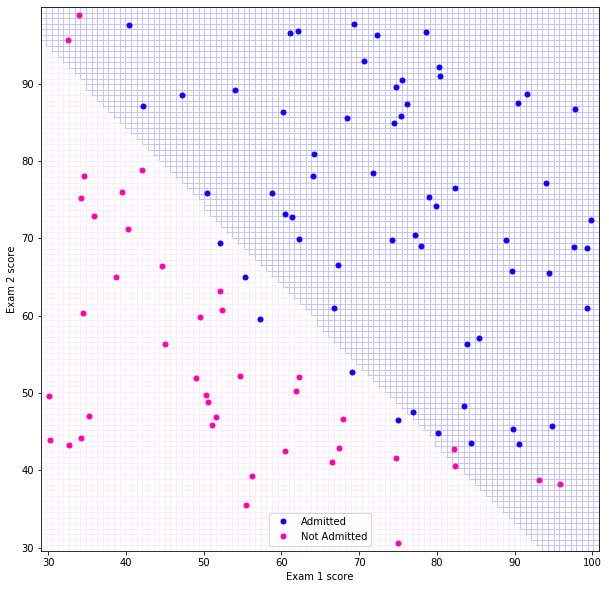

In [14]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-1., np.max(X_train[:,0])+1., np.min(X_train[:,1])-1., np.max(X_train[:,1])+1.])
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
u = np.linspace(np.min(X_train[:,0])-1., np.max(X_train[:,0])+1., 100)
v = np.linspace(np.min(X_train[:,1])-1., np.max(X_train[:,1])+1., 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = model.predict(z)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='Admitted') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='Not Admitted')
ax.legend()